B84 AHMET ESAT YILMAZ PROJECT

### FOOTBALL PLAYERS MARKET VALUE (PMV) PREDICTION

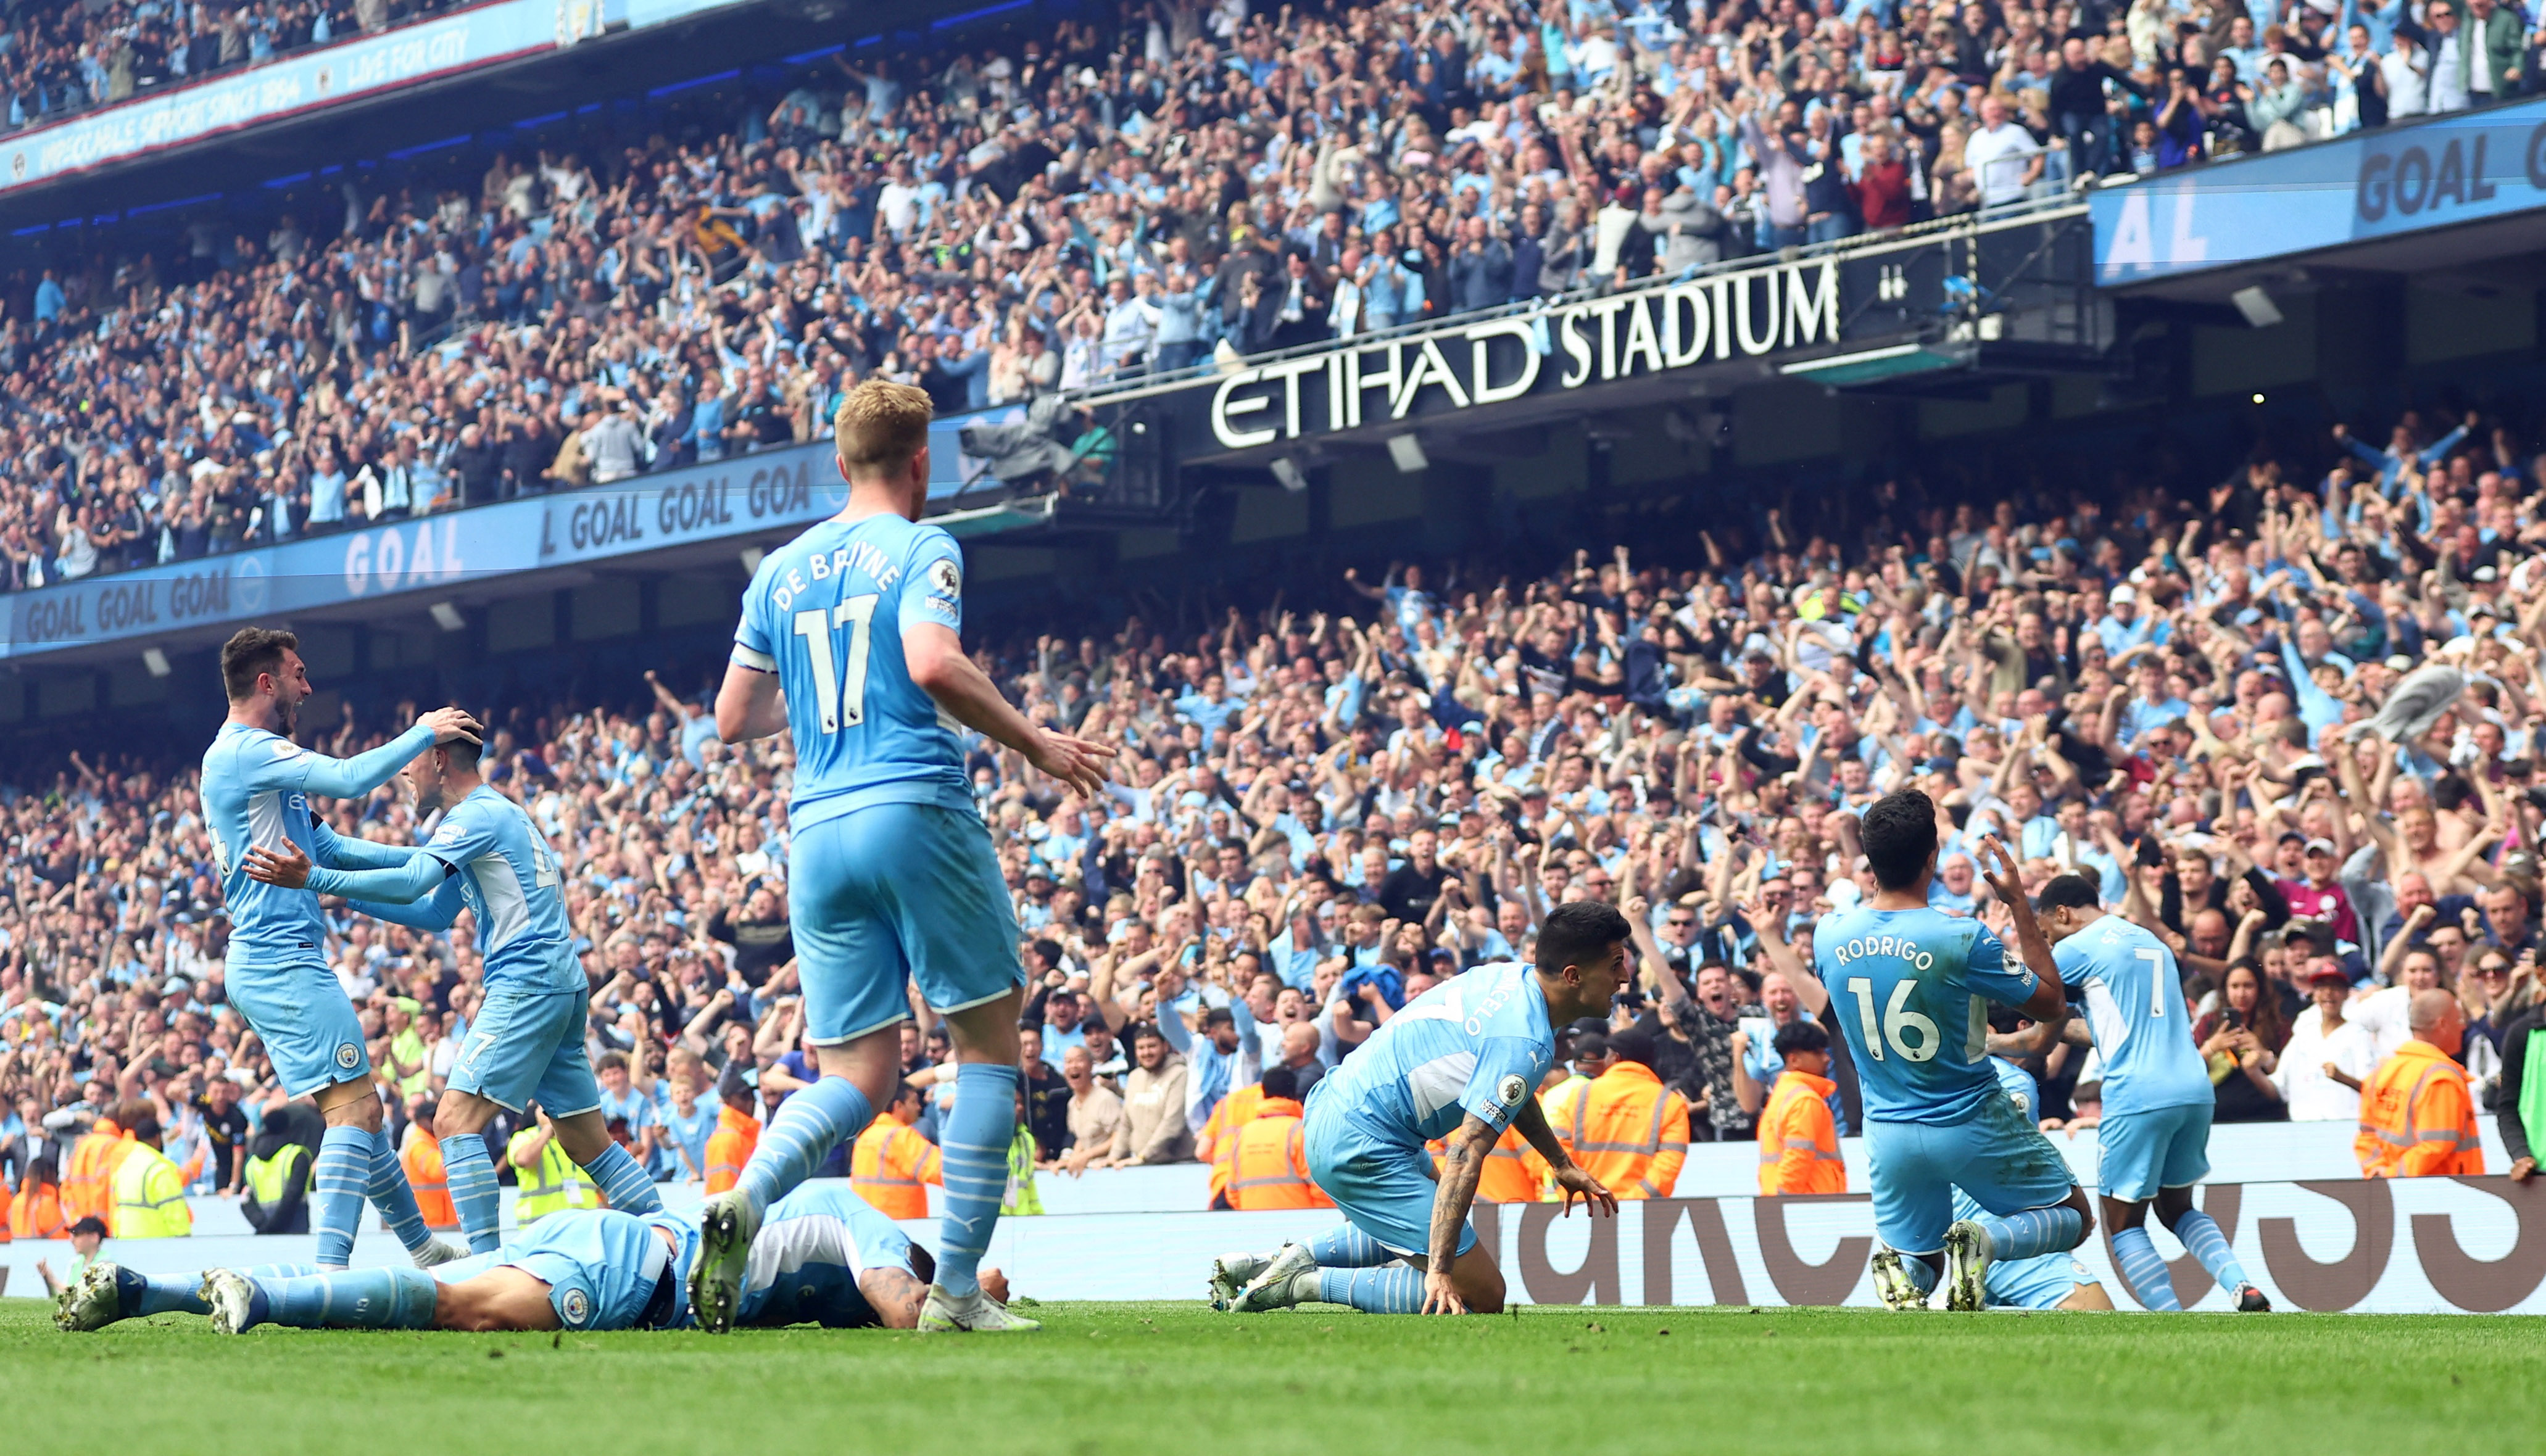

In [1]:
from IPython.display import Image
image_path = 'C:/Users/ytesa/Downloads/miracle.jpg'
Image(filename=image_path)

I found the data through a search on Google's dataset search site. It directed me directly to the Kaggle website ("https://www.kaggle.com/datasets/vivovinco/20222023-football-team-stats").

The goal of this project is to train a machine to predict a football player's real-world market value using the football data I have.

This is a project that requires domain knowledge. But fortunately, I have this domain knowledge.

A player's market value is determined by how well he plays. If he plays well and has a high market value, it will be reflected in his statistics. In this deductive case, I want to teach the machine induction.

I will use a regression model for this data because it is numerical and there is a direct correlation between player statistics and market value.

---

### IMPORT LIBRARY

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import yellowbrick


import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler

---

### READ DATASET

In [3]:
Stats= pd.read_csv("PlayerStats.csv", skip_blank_lines=True, delimiter=';')

df= Stats.copy()
df

Rk             Player Nation   Pos          Squad            Comp  \
0        1   Brendan Aaronson    USA  MFFW   Leeds United  Premier League   
1        2   Yunis Abdelhamid    MAR    DF          Reims         Ligue 1   
2        3      Himad Abdelli    FRA  MFFW         Angers         Ligue 1   
3        4  Salis Abdul Samed    GHA    MF           Lens         Ligue 1   
4        5    Laurent Abergel    FRA    MF        Lorient         Ligue 1   
...    ...                ...    ...   ...            ...             ...   
2684  2685   Szymon ?urkowski    POL    MF     Fiorentina         Serie A   
2685  2686   Szymon ?urkowski    POL    MF         Spezia         Serie A   
2686  2687    Martin  degaard    NOR    MF        Arsenal  Premier League   
2687  2688        Milan ?uri?    BIH    FW  Hellas Verona         Serie A   
2688  2689      Filip ?uri?i?    SRB  MFFW      Sampdoria         Serie A   

      Age  Born  MP  Starts  ...   Off   Crs  TklW  PKwon  PKcon    OG  Recov  \
0      22  2000  20      19  ...  0.17  2.54  0.51    0.0    0.0  0.00   4.86   
1      35  1987  22      22  ...  0.05  0.18  1.59    0.0    0.0  0.00   6.64   
2      23  1999  14       8  ...  0.00  1.05  1.40    0.0    0.0  0.00   8.14   
3      22  2000  20      20  ...  0.00  0.35  0.80    0.0    0.0  0.05   6.60   
4      30  1993  15      15  ...  0.00  0.23  2.02    0.0    0.0  0.00   6.51   
...   ...   ...  ..     ...  ...   ...   ...   ...    ...    ...   ...    ...   
2684   25  1997   2       0  ...  0.00  2.50  0.00    0.0    0.0  0.00   5.00   
2685   25  1997   1       0  ...  0.00  0.00  0.00    0.0    0.0  0.00  30.00   
2686   24  1998  20      20  ...  0.05  2.51  0.70    0.0    0.0  0.00   5.19   
2687   32  1990  16       7  ...  0.38  0.00  0.13    0.0    0.0  0.00   2.05   
2688   31  1992  20      17  ...  0.00  1.56  0.88    0.0    0.0  0.00   4.97   

      AerWon  AerLost  AerWon%  
0       0.34     1.19     22.2  
1       2.18     1.23     64.0  
2       0.93     1.05     47.1  
3       0.50     0.50     50.0  
4       0.31     0.39     44.4  
...      ...      ...      ...  
2684    2.50     2.50     50.0  
2685    0.00     0.00      0.0  
2686    0.48     0.70     40.9  
2687   14.50     3.59     80.1  
2688    0.54     0.88     38.1  

[2689 rows x 124 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 124 entries, Rk to AerWon%
dtypes: float64(112), int64(7), object(5)
memory usage: 2.5+ MB


In [5]:
df.head()

Rk             Player Nation   Pos         Squad            Comp  Age  \
0   1   Brendan Aaronson    USA  MFFW  Leeds United  Premier League   22   
1   2   Yunis Abdelhamid    MAR    DF         Reims         Ligue 1   35   
2   3      Himad Abdelli    FRA  MFFW        Angers         Ligue 1   23   
3   4  Salis Abdul Samed    GHA    MF          Lens         Ligue 1   22   
4   5    Laurent Abergel    FRA    MF       Lorient         Ligue 1   30   

   Born  MP  Starts  ...   Off   Crs  TklW  PKwon  PKcon    OG  Recov  AerWon  \
0  2000  20      19  ...  0.17  2.54  0.51    0.0    0.0  0.00   4.86    0.34   
1  1987  22      22  ...  0.05  0.18  1.59    0.0    0.0  0.00   6.64    2.18   
2  1999  14       8  ...  0.00  1.05  1.40    0.0    0.0  0.00   8.14    0.93   
3  2000  20      20  ...  0.00  0.35  0.80    0.0    0.0  0.05   6.60    0.50   
4  1993  15      15  ...  0.00  0.23  2.02    0.0    0.0  0.00   6.51    0.31   

   AerLost  AerWon%  
0     1.19     22.2  
1     1.23     64.0  
2     1.05     47.1  
3     0.50     50.0  
4     0.39     44.4  

[5 rows x 124 columns]

In [6]:
df.tail()

Rk            Player Nation   Pos          Squad            Comp  Age  \
2684  2685  Szymon ?urkowski    POL    MF     Fiorentina         Serie A   25   
2685  2686  Szymon ?urkowski    POL    MF         Spezia         Serie A   25   
2686  2687   Martin  degaard    NOR    MF        Arsenal  Premier League   24   
2687  2688       Milan ?uri?    BIH    FW  Hellas Verona         Serie A   32   
2688  2689     Filip ?uri?i?    SRB  MFFW      Sampdoria         Serie A   31   

      Born  MP  Starts  ...   Off   Crs  TklW  PKwon  PKcon   OG  Recov  \
2684  1997   2       0  ...  0.00  2.50  0.00    0.0    0.0  0.0   5.00   
2685  1997   1       0  ...  0.00  0.00  0.00    0.0    0.0  0.0  30.00   
2686  1998  20      20  ...  0.05  2.51  0.70    0.0    0.0  0.0   5.19   
2687  1990  16       7  ...  0.38  0.00  0.13    0.0    0.0  0.0   2.05   
2688  1992  20      17  ...  0.00  1.56  0.88    0.0    0.0  0.0   4.97   

      AerWon  AerLost  AerWon%  
2684    2.50     2.50     50.0  
2685    0.00     0.00      0.0  
2686    0.48     0.70     40.9  
2687   14.50     3.59     80.1  
2688    0.54     0.88     38.1  

[5 rows x 124 columns]

In [7]:
df.describe().T

count         mean         std     min      25%      50%      75%  \
Rk       2689.0  1345.000000  776.391761     1.0   673.00  1345.00  2017.00   
Age      2689.0    26.011157    4.446259    15.0    23.00    26.00    29.00   
Born     2689.0  1996.155820    4.450108  1981.0  1993.00  1996.00  2000.00   
MP       2689.0    11.833023    6.864278     1.0     5.00    13.00    18.00   
Starts   2689.0     8.476013    6.994383     0.0     2.00     7.00    14.00   
...         ...          ...         ...     ...      ...      ...      ...   
OG       2689.0     0.003142    0.022607     0.0     0.00     0.00     0.00   
Recov    2689.0     4.951967    2.901833     0.0     3.33     5.00     6.27   
AerWon   2689.0     1.312064    1.579539     0.0     0.33     0.93     1.79   
AerLost  2689.0     1.497356    1.830391     0.0     0.55     1.10     1.83   
AerWon%  2689.0    43.583600   26.673092     0.0    27.60    46.40    60.00   

            max  
Rk       2689.0  
Age        41.0  
Born     2007.0  
MP         23.0  
Starts     23.0  
...         ...  
OG          0.5  
Recov      30.0  
AerWon     25.0  
AerLost    30.0  
AerWon%   100.0  

[119 rows x 8 columns]

In [8]:
print(df.columns)

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts',
       ...
       'Off', 'Crs', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'AerWon',
       'AerLost', 'AerWon%'],
      dtype='object', length=124)


---

### DATA ENGINEERING

There are too many unnecessary columns.

In [9]:
df = df.drop(columns=['Rk', 'Born', 'Starts', '90s'])

In [10]:
df = df.drop(columns=['Min','SoT','G/SoT','ShoDist','ShoFK','ShoPK','PKatt','PasTotDist',
                      'PasTotPrgDist','PasShoAtt','PasShoCmp%','PasMedCmp','PasMedAtt','PasMedCmp%',
                      'PasLonAtt'])

In [11]:
df = df.drop(columns=['SoT%','PasTotAtt','PasAss','PPA','CrsPA',
                      'PasProg','PasAtt','PasLive','PasDead','PasFK',
                      'TB','Sw','PasCrs','TI','CK','CkIn','CkOut','CkStr','ScaFld','ScaDef',
                      'PasCmp','PasOff','ScaPassLive','ScaPassDead','ScaDrib','ScaSh'])

In [12]:
df = df.drop(columns=['GcaPassLive','GcaPassDead','GcaDrib','GcaSh','GcaFld','GcaDef',
                      'TklDri','TklDriAtt','TklDri%','TklDef3rd','TklMid3rd','TklAtt3rd',
                      'TklDriPast','Tkl','Int','Err','Touches','TouDefPen','TouDef3rd','TouMid3rd',
                      'TouAtt3rd','TouAttPen','TouLive','ToAtt','ToSuc','ToSuc%','ToTkl','ToTkl%',
                      'CarTotDist','CarPrgDist','CarProg','Car3rd','CarMis','CarDis','RecProg',
                      'CrdY','CrdR','2CrdY','Fls','Fld','Off',
                      'Crs','TklW','PKwon','OG','AerWon','AerLost'])

In [13]:
df = df.drop(columns=['PKcon'])
df = df.drop(columns=['Rec'])

In [14]:
df

Player Nation   Pos          Squad            Comp  Age  MP  \
0      Brendan Aaronson    USA  MFFW   Leeds United  Premier League   22  20   
1      Yunis Abdelhamid    MAR    DF          Reims         Ligue 1   35  22   
2         Himad Abdelli    FRA  MFFW         Angers         Ligue 1   23  14   
3     Salis Abdul Samed    GHA    MF           Lens         Ligue 1   22  20   
4       Laurent Abergel    FRA    MF        Lorient         Ligue 1   30  15   
...                 ...    ...   ...            ...             ...  ...  ..   
2684   Szymon ?urkowski    POL    MF     Fiorentina         Serie A   25   2   
2685   Szymon ?urkowski    POL    MF         Spezia         Serie A   25   1   
2686    Martin  degaard    NOR    MF        Arsenal  Premier League   24  20   
2687        Milan ?uri?    BIH    FW  Hellas Verona         Serie A   32  16   
2688      Filip ?uri?i?    SRB  MFFW      Sampdoria         Serie A   31  20   

      Goals  Shots  G/Sh  ...  TklWon  Blocks  BlkSh  BlkPass  Tkl+Int   Clr  \
0         1   1.53  0.04  ...    0.51    1.69   0.11     1.58     1.69  0.28   
1         0   0.86  0.00  ...    1.59    2.23   0.77     1.45     4.50  2.91   
2         0   1.05  0.00  ...    1.40    1.51   0.12     1.40     3.84  0.93   
3         1   0.60  0.08  ...    0.80    1.30   0.35     0.95     2.60  0.80   
4         0   0.31  0.00  ...    2.02    1.40   0.23     1.16     4.96  1.55   
...     ...    ...   ...  ...     ...     ...    ...      ...      ...   ...   
2684      0   5.00  0.00  ...    0.00    0.00   0.00     0.00     0.00  0.00   
2685      0   0.00  0.00  ...    0.00    0.00   0.00     0.00    10.00  0.00   
2686      8   2.73  0.16  ...    0.70    0.48   0.11     0.37     1.18  0.37   
2687      1   1.03  0.13  ...    0.13    0.64   0.38     0.26     0.26  1.41   
2688      2   1.16  0.12  ...    0.88    0.75   0.14     0.61     2.24  0.20   

      Carries   CPA  Recov  AerWon%  
0        26.7  0.40   4.86     22.2  
1        40.0  0.09   6.64     64.0  
2        48.5  0.47   8.14     47.1  
3        61.0  0.15   6.60     50.0  
4        41.0  0.00   6.51     44.4  
...       ...   ...    ...      ...  
2684     40.0  2.50   5.00     50.0  
2685     30.0  0.00  30.00      0.0  
2686     33.0  0.96   5.19     40.9  
2687     18.5  0.26   2.05     80.1  
2688     25.0  0.20   4.97     38.1  

[2689 rows x 30 columns]

I wanted to remove the lines that have '?' in their names.

In [15]:
x = df[df['Player'].str.contains('\?')]

In [16]:
print("Indexs:")
print(x.index)

Indexs:
Index([  95,  120,  158,  209,  232,  264,  278,  287,  290,  298,
       ...
       2497, 2526, 2567, 2568, 2618, 2671, 2684, 2685, 2687, 2688],
      dtype='int64', length=105)


In [17]:
df = df[~df['Player'].str.contains('\?')]

In [18]:
df

Player Nation   Pos          Squad            Comp  Age  MP  \
0      Brendan Aaronson    USA  MFFW   Leeds United  Premier League   22  20   
1      Yunis Abdelhamid    MAR    DF          Reims         Ligue 1   35  22   
2         Himad Abdelli    FRA  MFFW         Angers         Ligue 1   23  14   
3     Salis Abdul Samed    GHA    MF           Lens         Ligue 1   22  20   
4       Laurent Abergel    FRA    MF        Lorient         Ligue 1   30  15   
...                 ...    ...   ...            ...             ...  ...  ..   
2680         Kurt Zouma    FRA    DF       West Ham  Premier League   28  15   
2681        Petar Zovko    BIH    GK         Spezia         Serie A   20   1   
2682      Igor Zubeldia    ESP    DF  Real Sociedad         La Liga   25  16   
2683   Mart n Zubimendi    ESP    MF  Real Sociedad         La Liga   24  19   
2686    Martin  degaard    NOR    MF        Arsenal  Premier League   24  20   

      Goals  Shots  G/Sh  ...  TklWon  Blocks  BlkSh  BlkPass  Tkl+Int   Clr  \
0         1   1.53  0.04  ...    0.51    1.69   0.11     1.58     1.69  0.28   
1         0   0.86  0.00  ...    1.59    2.23   0.77     1.45     4.50  2.91   
2         0   1.05  0.00  ...    1.40    1.51   0.12     1.40     3.84  0.93   
3         1   0.60  0.08  ...    0.80    1.30   0.35     0.95     2.60  0.80   
4         0   0.31  0.00  ...    2.02    1.40   0.23     1.16     4.96  1.55   
...     ...    ...   ...  ...     ...     ...    ...      ...      ...   ...   
2680      1   0.77  0.09  ...    0.14    0.49   0.49     0.00     1.20  5.42   
2681      0   0.00  0.00  ...    0.00    0.00   0.00     0.00     1.25  0.00   
2682      1   0.29  0.25  ...    0.86    1.00   0.79     0.21     2.21  4.07   
2683      1   0.28  0.20  ...    1.07    1.24   0.51     0.73     2.92  1.85   
2686      8   2.73  0.16  ...    0.70    0.48   0.11     0.37     1.18  0.37   

      Carries   CPA  Recov  AerWon%  
0        26.7  0.40   4.86     22.2  
1        40.0  0.09   6.64     64.0  
2        48.5  0.47   8.14     47.1  
3        61.0  0.15   6.60     50.0  
4        41.0  0.00   6.51     44.4  
...       ...   ...    ...      ...  
2680     27.3  0.00   3.94     88.1  
2681     22.5  0.00   2.50      0.0  
2682     37.4  0.07   4.93     56.0  
2683     37.1  0.06   6.18     70.9  
2686     33.0  0.96   5.19     40.9  

[2584 rows x 30 columns]

I wanted to check if there is any missing values.

In [19]:
df.isnull().sum()

Player        0
Nation        1
Pos           0
Squad         0
Comp          0
Age           0
MP            0
Goals         0
Shots         0
G/Sh          0
PasTotCmp     0
PasTotCmp%    0
PasShoCmp     0
PasLonCmp     0
PasLonCmp%    0
Assists       0
Pas3rd        0
PasBlocks     0
SCA           0
GCA           0
TklWon        0
Blocks        0
BlkSh         0
BlkPass       0
Tkl+Int       0
Clr           0
Carries       0
CPA           0
Recov         0
AerWon%       0
dtype: int64

In [20]:
missing_value= df[df['Nation'].isnull()]
missing_value.index

Index([1875], dtype='int64')

In [21]:
df.drop(1875, inplace=True)

In [22]:
df.isnull().sum()

Player        0
Nation        0
Pos           0
Squad         0
Comp          0
Age           0
MP            0
Goals         0
Shots         0
G/Sh          0
PasTotCmp     0
PasTotCmp%    0
PasShoCmp     0
PasLonCmp     0
PasLonCmp%    0
Assists       0
Pas3rd        0
PasBlocks     0
SCA           0
GCA           0
TklWon        0
Blocks        0
BlkSh         0
BlkPass       0
Tkl+Int       0
Clr           0
Carries       0
CPA           0
Recov         0
AerWon%       0
dtype: int64

There are too many Nations. I wanted to remove countries with few players because I was considering doing encoding.

In [23]:
df['Nation'].unique()

array(['USA', 'MAR', 'FRA', 'GHA', 'DEN', 'BRA', 'ENG', 'ITA', 'ARG',
       'SCO', 'ARM', 'GER', 'SUI', 'CIV', 'ESP', 'COL', 'SWE', 'NGA',
       'AUT', 'NOR', 'NED', 'CHI', 'PAR', 'TUR', 'GAB', 'POR', 'GLP',
       'URU', 'SEN', 'WAL', 'JAM', 'BUL', 'JPN', 'KVX', 'ALB', 'TOG',
       'ALG', 'IRN', 'BEL', 'COD', 'CMR', 'ZAM', 'GRN', 'CZE', 'LUX',
       'GAM', 'BFA', 'IRL', 'CPV', 'SUR', 'POL', 'ANG', 'GNB', 'SVN',
       'MLI', 'MAD', 'SRB', 'CRO', 'TUN', 'NZL', 'ECU', 'PER', 'GUI',
       'MKD', 'MEX', 'ISR', 'CAN', 'MTQ', 'BEN', 'COM', 'SVK', 'HON',
       'ISL', 'EGY', 'NIR', 'AUS', 'CRC', 'CGO', 'LTU', 'RUS', 'HUN',
       'KOR', 'EQG', 'VEN', 'PHI', 'ROU', 'BIH', 'HAI', 'FIN', 'ZIM',
       'SLE', 'GRE', 'CYP', 'CTA', 'UKR', 'LVA', 'GEO', 'MOZ', 'DOM',
       'RSA', 'BDI', 'GUF', 'MNE', 'UZB'], dtype=object)

In [24]:
df.drop(df[df['Nation'] == 'GEO'].index, inplace=True)

In [25]:
country_list= ['ARM','CHI','PAR','GAB','GLP','JAM','BUL','KVX','ALB','TOG','IRN','COD','ZAM','GRN','LUX','GAM','BFA',
    'CPV','SUR','ANG','GNB','MAD','PER','NZL','GUI','MKD','ISR','MTQ','BEN','COM','HON','CRC','CGO','LTU',
    'EQG','VEN','PHI','BIH','HAI','ZIM','SIE','CYP','CTA','LVA','MOZ','DOM','RSA','BDI','GUF','MNE','UZB']

In [26]:
df= df[~df['Nation'].isin(country_list)]

In [27]:
df['Nation'].unique()

array(['USA', 'MAR', 'FRA', 'GHA', 'DEN', 'BRA', 'ENG', 'ITA', 'ARG',
       'SCO', 'GER', 'SUI', 'CIV', 'ESP', 'COL', 'SWE', 'NGA', 'AUT',
       'NOR', 'NED', 'TUR', 'POR', 'URU', 'SEN', 'WAL', 'JPN', 'ALG',
       'BEL', 'CMR', 'CZE', 'IRL', 'POL', 'SVN', 'MLI', 'SRB', 'CRO',
       'TUN', 'ECU', 'MEX', 'CAN', 'SVK', 'ISL', 'EGY', 'NIR', 'AUS',
       'RUS', 'HUN', 'KOR', 'ROU', 'FIN', 'SLE', 'GRE', 'UKR'],
      dtype=object)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2409 entries, 0 to 2686
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      2409 non-null   object 
 1   Nation      2409 non-null   object 
 2   Pos         2409 non-null   object 
 3   Squad       2409 non-null   object 
 4   Comp        2409 non-null   object 
 5   Age         2409 non-null   int64  
 6   MP          2409 non-null   int64  
 7   Goals       2409 non-null   int64  
 8   Shots       2409 non-null   float64
 9   G/Sh        2409 non-null   float64
 10  PasTotCmp   2409 non-null   float64
 11  PasTotCmp%  2409 non-null   float64
 12  PasShoCmp   2409 non-null   float64
 13  PasLonCmp   2409 non-null   float64
 14  PasLonCmp%  2409 non-null   float64
 15  Assists     2409 non-null   float64
 16  Pas3rd      2409 non-null   float64
 17  PasBlocks   2409 non-null   float64
 18  SCA         2409 non-null   float64
 19  GCA         2409 non-null   floa

"The column names are a bit confusing. I wanted to rename them.

In [29]:
changes1= {
    'Player': 'Name',
    'Pos': 'Position',
    'Squad': 'Team',
    'Comp': 'League',
    'PasTotCmp': 'CompPass',
    'PasTotCmp%': 'CompPass%',
    'PasShoCmp': 'ShoPass',
    'PasLonCmp': 'LongPass',
    'PasLonCmp%': 'LongPass%',
    'Clr': 'Clearence',
    'Tkl+Int': 'TklInt',
}

In [30]:
df.rename(columns=changes1, inplace=True)

In [31]:
df = df.drop(columns=['PasBlocks', 'BlkSh', 'BlkPass'])

The data I received is missing with the target label. I wanted to add the target label.

In [32]:
df['Market_Value']= '1'

In [33]:
df['Market_Value'] = df['Market_Value'].astype(float)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2409 entries, 0 to 2686
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2409 non-null   object 
 1   Nation        2409 non-null   object 
 2   Position      2409 non-null   object 
 3   Team          2409 non-null   object 
 4   League        2409 non-null   object 
 5   Age           2409 non-null   int64  
 6   MP            2409 non-null   int64  
 7   Goals         2409 non-null   int64  
 8   Shots         2409 non-null   float64
 9   G/Sh          2409 non-null   float64
 10  CompPass      2409 non-null   float64
 11  CompPass%     2409 non-null   float64
 12  ShoPass       2409 non-null   float64
 13  LongPass      2409 non-null   float64
 14  LongPass%     2409 non-null   float64
 15  Assists       2409 non-null   float64
 16  Pas3rd        2409 non-null   float64
 17  SCA           2409 non-null   float64
 18  GCA           2409 non-null   flo

There are no statistics for goalkeepers. So I wanted to remove goalkeepers from the dataset.

In [35]:
df.describe().T

count       mean        std   min    25%    50%    75%    max
Age           2409.0  25.899958   4.445260  15.0  22.00  26.00  29.00   41.0
MP            2409.0  11.852221   6.839261   1.0   5.00  13.00  18.00   23.0
Goals         2409.0   1.024491   2.012993   0.0   0.00   0.00   1.00   25.0
Shots         2409.0   1.217995   1.372375   0.0   0.26   0.85   1.82   15.0
G/Sh          2409.0   0.064894   0.119698   0.0   0.00   0.00   0.10    1.0
CompPass      2409.0  33.865201  17.159794   0.0  22.20  32.20  43.40  235.0
CompPass%     2409.0  75.787671  12.806478   0.0  70.70  77.70  83.30  100.0
ShoPass       2409.0  15.638078   8.517108   0.0  10.00  14.90  20.00  115.0
LongPass      2409.0   3.304890   2.973251   0.0   1.18   2.67   4.74   35.0
LongPass%     2409.0  51.583645  23.816326   0.0  41.80  53.80  66.70  100.0
Assists       2409.0   0.083578   0.281622   0.0   0.00   0.00   0.11   10.0
Pas3rd        2409.0   2.579689   2.226185   0.0   1.00   2.22   3.57   25.0
SCA           2409.0   2.081216   1.912034   0.0   0.72   1.83   3.00   30.0
GCA           2409.0   0.210569   0.472864   0.0   0.00   0.08   0.30   10.0
TklWon        2409.0   1.004363   1.249596   0.0   0.33   0.85   1.33   20.0
Blocks        2409.0   1.090855   1.183423   0.0   0.51   1.00   1.43   20.0
TklInt        2409.0   2.551553   2.117492   0.0   1.19   2.45   3.43   20.0
Clearence     2409.0   1.590104   1.733231   0.0   0.38   1.02   2.34   20.0
Carries       2409.0  32.014612  14.127542   0.0  22.90  30.00  38.80  150.0
CPA           2409.0   0.436488   0.876506   0.0   0.00   0.10   0.56   15.0
Recov         2409.0   4.984271   2.857846   0.0   3.33   5.00   6.32   30.0
AerWon%       2409.0  43.623163  26.543551   0.0  27.60  46.40  60.00  100.0
Market_Value  2409.0   1.000000   0.000000   1.0   1.00   1.00   1.00    1.0

In [36]:
df.drop(df[df['Position'] == 'GK'].index, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2268 entries, 0 to 2686
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2268 non-null   object 
 1   Nation        2268 non-null   object 
 2   Position      2268 non-null   object 
 3   Team          2268 non-null   object 
 4   League        2268 non-null   object 
 5   Age           2268 non-null   int64  
 6   MP            2268 non-null   int64  
 7   Goals         2268 non-null   int64  
 8   Shots         2268 non-null   float64
 9   G/Sh          2268 non-null   float64
 10  CompPass      2268 non-null   float64
 11  CompPass%     2268 non-null   float64
 12  ShoPass       2268 non-null   float64
 13  LongPass      2268 non-null   float64
 14  LongPass%     2268 non-null   float64
 15  Assists       2268 non-null   float64
 16  Pas3rd        2268 non-null   float64
 17  SCA           2268 non-null   float64
 18  GCA           2268 non-null   flo

I was originally planning to use player positions for data training, but after reviewing them, I realized that the positions did not accurately reflect reality. So, I decided to drop this column.

In [38]:
df['Position'].unique()

array(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'DFMF', 'FWDF'],
      dtype=object)

In [39]:
df = df.drop(columns=['Position'])

Normally, I would do encoding or create dummy variables, but this time it would increase the number of columns. Instead, I ranked countries and leagues according to their power rankings because these are the parameters that directly affect the outcome. For example, the market value assessment of a Brazilian footballer is different from that of a Slovenian footballer.

In [40]:
country_labels= {'USA':3, 'MAR':4, 'FRA':5, 'GHA':2, 'DEN':4, 'BRA':5, 'ENG':5, 'ITA':5, 'ARG':5,
       'SCO':4, 'GER':5, 'SUI':3, 'CIV':3, 'ESP':5, 'COL':4, 'SWE':2, 'NGA':3, 'AUT':3,
       'NOR':2, 'NED':5, 'TUR':3, 'POR':5, 'URU':4, 'SEN':3, 'WAL':2, 'JPN':3, 'ALG':3,
       'BEL':4, 'CMR':2, 'CZE':1, 'IRL':1, 'POL':1, 'SVN':1, 'MLI':1, 'SRB':2, 'CRO':4,
       'TUN':1, 'ECU':3, 'MEX':3, 'CAN':2, 'SVK':2, 'ISL':1, 'EGY':1, 'NIR':2, 'AUS':2,
       'RUS':3, 'HUN':2, 'KOR':3, 'ROU':1, 'FIN':1, 'SLE':1, 'GRE':2, 'UKR':2}

In [41]:
df['Nation_Ranking'] = df['Nation'].map(country_labels)

In [42]:
df.drop(columns=['Nation'], inplace=True)

In [43]:
league_labels= {'Premier League':5,'La Liga':4,'Bundesliga':3,'Serie A':2,'Ligue 1':1}

In [44]:
df['League_Ranking'] = df['League'].map(league_labels)

In [45]:
df.drop(columns=['League'], inplace=True)

In [46]:
df = df[['Name','Team','Nation_Ranking','League_Ranking','Age','MP','Goals','Shots','G/Sh','CompPass','CompPass%',
         'ShoPass','LongPass','LongPass%','Assists','Pas3rd','SCA','GCA','TklWon','TklInt',
         'Blocks','Clearence','Carries','CPA','Recov','AerWon%','Market_Value']]
#Nation_Ranking and League_Ranking columns place fixed

In [47]:
df

Name           Team  Nation_Ranking  League_Ranking  Age  \
0      Brendan Aaronson   Leeds United               3               5   22   
1      Yunis Abdelhamid          Reims               4               1   35   
2         Himad Abdelli         Angers               5               1   23   
3     Salis Abdul Samed           Lens               2               1   22   
4       Laurent Abergel        Lorient               5               1   30   
...                 ...            ...             ...             ...  ...   
2679       Nadir Zortea       Sassuolo               5               2   23   
2680         Kurt Zouma       West Ham               5               5   28   
2682      Igor Zubeldia  Real Sociedad               5               4   25   
2683   Mart n Zubimendi  Real Sociedad               5               4   24   
2686    Martin  degaard        Arsenal               2               5   24   

      MP  Goals  Shots  G/Sh  CompPass  ...   GCA  TklWon  TklInt  Blocks  \
0     20      1   1.53  0.04      23.2  ...  0.28    0.51    1.69    1.69   
1     22      0   0.86  0.00      38.5  ...  0.18    1.59    4.50    2.23   
2     14      0   1.05  0.00      40.0  ...  0.00    1.40    3.84    1.51   
3     20      1   0.60  0.08      59.5  ...  0.00    0.80    2.60    1.30   
4     15      0   0.31  0.00      37.9  ...  0.08    2.02    4.96    1.40   
...   ..    ...    ...   ...       ...  ...   ...     ...     ...     ...   
2679   1      0   2.00  0.00      59.0  ...  0.00    2.00    2.00    1.00   
2680  15      1   0.77  0.09      36.8  ...  0.14    0.14    1.20    0.49   
2682  16      1   0.29  0.25      45.8  ...  0.07    0.86    2.21    1.00   
2683  19      1   0.28  0.20      45.0  ...  0.22    1.07    2.92    1.24   
2686  20      8   2.73  0.16      38.3  ...  0.64    0.70    1.18    0.48   

      Clearence  Carries   CPA  Recov  AerWon%  Market_Value  
0          0.28     26.7  0.40   4.86     22.2           1.0  
1          2.91     40.0  0.09   6.64     64.0           1.0  
2          0.93     48.5  0.47   8.14     47.1           1.0  
3          0.80     61.0  0.15   6.60     50.0           1.0  
4          1.55     41.0  0.00   6.51     44.4           1.0  
...         ...      ...   ...    ...      ...           ...  
2679       1.00     48.0  0.00   7.00     33.3           1.0  
2680       5.42     27.3  0.00   3.94     88.1           1.0  
2682       4.07     37.4  0.07   4.93     56.0           1.0  
2683       1.85     37.1  0.06   6.18     70.9           1.0  
2686       0.37     33.0  0.96   5.19     40.9           1.0  

[2268 rows x 27 columns]

There were duplicate names in the dataset. I wanted to drop the one with the lower "MP" value.

In [48]:
name_counts = df['Name'].value_counts()

In [49]:
duplicated_names = name_counts[name_counts > 1].index

In [50]:
duplicates_df = df[df['Name'].isin(duplicated_names)]

In [51]:
index_to_drop = duplicates_df.groupby('Name')['MP'].idxmin()

In [52]:
df = df.drop(index_to_drop)

I thought it would be better to drop data with a lot of "0" values in a row.

In [53]:
zero_counts = (df == 0).sum(axis=1)

In [54]:
rows_to_drop = zero_counts[zero_counts > 10].index

In [55]:
df = df.drop(rows_to_drop)

In [56]:
df

Name           Team  Nation_Ranking  League_Ranking  Age  \
0      Brendan Aaronson   Leeds United               3               5   22   
1      Yunis Abdelhamid          Reims               4               1   35   
2         Himad Abdelli         Angers               5               1   23   
3     Salis Abdul Samed           Lens               2               1   22   
4       Laurent Abergel        Lorient               5               1   30   
...                 ...            ...             ...             ...  ...   
2678       Nadir Zortea       Atalanta               5               2   23   
2680         Kurt Zouma       West Ham               5               5   28   
2682      Igor Zubeldia  Real Sociedad               5               4   25   
2683   Mart n Zubimendi  Real Sociedad               5               4   24   
2686    Martin  degaard        Arsenal               2               5   24   

      MP  Goals  Shots  G/Sh  CompPass  ...   GCA  TklWon  TklInt  Blocks  \
0     20      1   1.53  0.04      23.2  ...  0.28    0.51    1.69    1.69   
1     22      0   0.86  0.00      38.5  ...  0.18    1.59    4.50    2.23   
2     14      0   1.05  0.00      40.0  ...  0.00    1.40    3.84    1.51   
3     20      1   0.60  0.08      59.5  ...  0.00    0.80    2.60    1.30   
4     15      0   0.31  0.00      37.9  ...  0.08    2.02    4.96    1.40   
...   ..    ...    ...   ...       ...  ...   ...     ...     ...     ...   
2678   9      1   1.60  0.25      24.0  ...  0.40    2.00    4.00    1.60   
2680  15      1   0.77  0.09      36.8  ...  0.14    0.14    1.20    0.49   
2682  16      1   0.29  0.25      45.8  ...  0.07    0.86    2.21    1.00   
2683  19      1   0.28  0.20      45.0  ...  0.22    1.07    2.92    1.24   
2686  20      8   2.73  0.16      38.3  ...  0.64    0.70    1.18    0.48   

      Clearence  Carries   CPA  Recov  AerWon%  Market_Value  
0          0.28     26.7  0.40   4.86     22.2           1.0  
1          2.91     40.0  0.09   6.64     64.0           1.0  
2          0.93     48.5  0.47   8.14     47.1           1.0  
3          0.80     61.0  0.15   6.60     50.0           1.0  
4          1.55     41.0  0.00   6.51     44.4           1.0  
...         ...      ...   ...    ...      ...           ...  
2678       1.60     31.2  0.80   5.60     83.3           1.0  
2680       5.42     27.3  0.00   3.94     88.1           1.0  
2682       4.07     37.4  0.07   4.93     56.0           1.0  
2683       1.85     37.1  0.06   6.18     70.9           1.0  
2686       0.37     33.0  0.96   5.19     40.9           1.0  

[1961 rows x 27 columns]

In [57]:
df['Name'].nunique()

1961

I wanted to drop rows with an "MP" value less than 3. This is because a player who plays few games cannot have much data, and it will be less than the others. I thought this would reduce the machine's predictive power.

In [58]:
df = df[df['MP'] > 5]

In [59]:
df

Name           Team  Nation_Ranking  League_Ranking  Age  \
0      Brendan Aaronson   Leeds United               3               5   22   
1      Yunis Abdelhamid          Reims               4               1   35   
2         Himad Abdelli         Angers               5               1   23   
3     Salis Abdul Samed           Lens               2               1   22   
4       Laurent Abergel        Lorient               5               1   30   
...                 ...            ...             ...             ...  ...   
2678       Nadir Zortea       Atalanta               5               2   23   
2680         Kurt Zouma       West Ham               5               5   28   
2682      Igor Zubeldia  Real Sociedad               5               4   25   
2683   Mart n Zubimendi  Real Sociedad               5               4   24   
2686    Martin  degaard        Arsenal               2               5   24   

      MP  Goals  Shots  G/Sh  CompPass  ...   GCA  TklWon  TklInt  Blocks  \
0     20      1   1.53  0.04      23.2  ...  0.28    0.51    1.69    1.69   
1     22      0   0.86  0.00      38.5  ...  0.18    1.59    4.50    2.23   
2     14      0   1.05  0.00      40.0  ...  0.00    1.40    3.84    1.51   
3     20      1   0.60  0.08      59.5  ...  0.00    0.80    2.60    1.30   
4     15      0   0.31  0.00      37.9  ...  0.08    2.02    4.96    1.40   
...   ..    ...    ...   ...       ...  ...   ...     ...     ...     ...   
2678   9      1   1.60  0.25      24.0  ...  0.40    2.00    4.00    1.60   
2680  15      1   0.77  0.09      36.8  ...  0.14    0.14    1.20    0.49   
2682  16      1   0.29  0.25      45.8  ...  0.07    0.86    2.21    1.00   
2683  19      1   0.28  0.20      45.0  ...  0.22    1.07    2.92    1.24   
2686  20      8   2.73  0.16      38.3  ...  0.64    0.70    1.18    0.48   

      Clearence  Carries   CPA  Recov  AerWon%  Market_Value  
0          0.28     26.7  0.40   4.86     22.2           1.0  
1          2.91     40.0  0.09   6.64     64.0           1.0  
2          0.93     48.5  0.47   8.14     47.1           1.0  
3          0.80     61.0  0.15   6.60     50.0           1.0  
4          1.55     41.0  0.00   6.51     44.4           1.0  
...         ...      ...   ...    ...      ...           ...  
2678       1.60     31.2  0.80   5.60     83.3           1.0  
2680       5.42     27.3  0.00   3.94     88.1           1.0  
2682       4.07     37.4  0.07   4.93     56.0           1.0  
2683       1.85     37.1  0.06   6.18     70.9           1.0  
2686       0.37     33.0  0.96   5.19     40.9           1.0  

[1659 rows x 27 columns]

The data is almost ready. Now I will assign values to the target label from Excel. I will get these values (players market value) from Transfermarkt.

In [60]:
df.to_csv('MyData.csv')

In [61]:
unique_names= df['Name'].unique()

In [62]:
for name in unique_names:
    print(name)

Brendan Aaronson
Yunis Abdelhamid
Himad Abdelli
Salis Abdul Samed
Laurent Abergel
Matthis Abline
Zakaria Aboukhlal
Tammy Abraham
Francesco Acerbi
Marcos Acu a
Che Adams
Tyler Adams
Tosin Adarabioyo
Karim Adeyemi
Amine Adli
Michel Aebischer
Felix Afena-Gyan
Emmanuel Agbadou
 lvaro Aguado
Kevin Agudelo
Nayef Aguerd
Ruben Aguilar
Naouirou Ahamada
Jean-Eudes Aholou
Joseph Aidoo
Ola Aina
Rayan A t Nouri
Emanuel Aiwum
Kristoffer Ajer
Ludovic Ajorque
Manuel Akanji
Nathan Ak 
Sergio Akieme
Maghnes Akliouche
Paul Akouokou
Jean-Daniel Akpa-Akpro
Kevin Akpoguma
David Alaba
Lucas Alario
Jordi Alba
Luis Alberto
Ra l Albiol
Marc Albrighton
Thiago Alc ntara
Rub n Alcaraz
Iv n Alejo
Carles Ale  
Trent Alexander-Arnold
 ngel Algobia
Mohamed Ali Cho
Faride Alidou
Domingos Andr  Ribeiro Almeida
Marcos Alonso
Gast n  lvarez
Juli n  lvarez
Agust n  lvarez Mart nez
Yeray  lvarez
Ibrahim Amadou
Daniel Amartey
Amath
Kelvin Amian
Bruno Amione
Nadiem Amiri
Ethan Ampadu
Sofyan Amrabat
Joachim Andersen
Elliot And

In [63]:
Stats= pd.read_csv("MyNewData.csv", skip_blank_lines=True, delimiter=',')
df= Stats.copy()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1640 non-null   object 
 1   Team            1640 non-null   object 
 2   Nation_Ranking  1640 non-null   int64  
 3   League_Ranking  1640 non-null   int64  
 4   Age             1640 non-null   int64  
 5   MP              1640 non-null   int64  
 6   Goals           1640 non-null   int64  
 7   Shots           1640 non-null   float64
 8   G/Sh            1640 non-null   float64
 9   CompPass        1640 non-null   float64
 10  CompPass%       1640 non-null   float64
 11  ShoPass         1640 non-null   float64
 12  LongPass        1640 non-null   float64
 13  LongPass%       1640 non-null   float64
 14  Assists         1640 non-null   float64
 15  Pas3rd          1640 non-null   float64
 16  SCA             1640 non-null   float64
 17  GCA             1640 non-null   f

In [65]:
df['Market_Value'] = df['Market_Value'].astype(float)

I decided to drop the columns with the object data type because I plan to use regression analysis. After this, the data will be finally ready. Here we go!

In [66]:
df = df.drop(columns=['Name','Team'])

In [67]:
changes2= {'Goals': 'TotGoals','Market_Value': 'MV'}

In [68]:
df.rename(columns=changes2, inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nation_Ranking  1640 non-null   int64  
 1   League_Ranking  1640 non-null   int64  
 2   Age             1640 non-null   int64  
 3   MP              1640 non-null   int64  
 4   TotGoals        1640 non-null   int64  
 5   Shots           1640 non-null   float64
 6   G/Sh            1640 non-null   float64
 7   CompPass        1640 non-null   float64
 8   CompPass%       1640 non-null   float64
 9   ShoPass         1640 non-null   float64
 10  LongPass        1640 non-null   float64
 11  LongPass%       1640 non-null   float64
 12  Assists         1640 non-null   float64
 13  Pas3rd          1640 non-null   float64
 14  SCA             1640 non-null   float64
 15  GCA             1640 non-null   float64
 16  TklWon          1640 non-null   float64
 17  TklInt          1640 non-null   f

In [70]:
df.describe().T

count       mean        std    min      25%     50%      75%  \
Nation_Ranking  1640.0   4.357927   1.108208   1.00   4.0000   5.000   5.0000   
League_Ranking  1640.0   3.023780   1.427541   1.00   2.0000   3.000   4.0000   
Age             1640.0  26.297561   4.222517  16.00  23.0000  26.000  29.0000   
MP              1640.0  15.176220   4.458203   6.00  12.0000  16.000  19.0000   
TotGoals        1640.0   1.457927   2.303285   0.00   0.0000   1.000   2.0000   
Shots           1640.0   1.308335   1.001942   0.00   0.5000   1.050   1.9300   
G/Sh            1640.0   0.080829   0.110410   0.00   0.0000   0.050   0.1300   
CompPass        1640.0  35.252732  14.923869   5.83  24.2000  34.200  44.4000   
CompPass%       1640.0  77.194756   8.525359  39.80  72.3000  78.400  83.3000   
ShoPass         1640.0  16.658945   6.796168   2.50  11.7000  15.800  20.6000   
LongPass        1640.0   3.163982   2.193404   0.00   1.5075   2.730   4.4450   
LongPass%       1640.0  56.793415  16.117775   0.00  47.8000  57.000  66.7000   
Assists         1640.0   0.096762   0.141452   0.00   0.0000   0.050   0.1500   
Pas3rd          1640.0   2.866043   1.785318   0.00   1.5800   2.570   3.7300   
SCA             1640.0   2.222171   1.290104   0.00   1.2500   2.080   3.0500   
GCA             1640.0   0.233878   0.247812   0.00   0.0000   0.160   0.3600   
TklWon          1640.0   1.012256   0.591727   0.00   0.6000   0.940   1.3500   
TklInt          1640.0   2.642659   1.287608   0.00   1.7375   2.575   3.4525   
Blocks          1640.0   1.116652   0.528196   0.00   0.7800   1.080   1.4200   
Clearence       1640.0   1.675293   1.418730   0.00   0.5900   1.270   2.4400   
Carries         1640.0  33.016567  11.764046   9.03  24.7000  31.200  39.3250   
CPA             1640.0   0.462860   0.634516   0.00   0.0000   0.230   0.6500   
Recov           1640.0   5.222963   1.731879   0.53   4.1175   5.255   6.3425   
AerWon%         1640.0  45.666463  18.110008   0.00  33.3000  47.700  58.3000   
MV              1640.0  14.641463  18.633212   1.00   5.0000   8.000  20.0000   

                   max  
Nation_Ranking    5.00  
League_Ranking    5.00  
Age              41.00  
MP               23.00  
TotGoals         25.00  
Shots             6.67  
G/Sh              1.00  
CompPass         97.20  
CompPass%        95.50  
ShoPass          49.10  
LongPass         13.00  
LongPass%       100.00  
Assists           1.43  
Pas3rd           15.40  
SCA               9.09  
GCA               1.88  
TklWon            5.00  
TklInt           10.90  
Blocks            3.81  
Clearence         8.52  
Carries          96.40  
CPA               6.92  
Recov            11.10  
AerWon%         100.00  
MV              180.00

---

### DATA VISUALIZATION

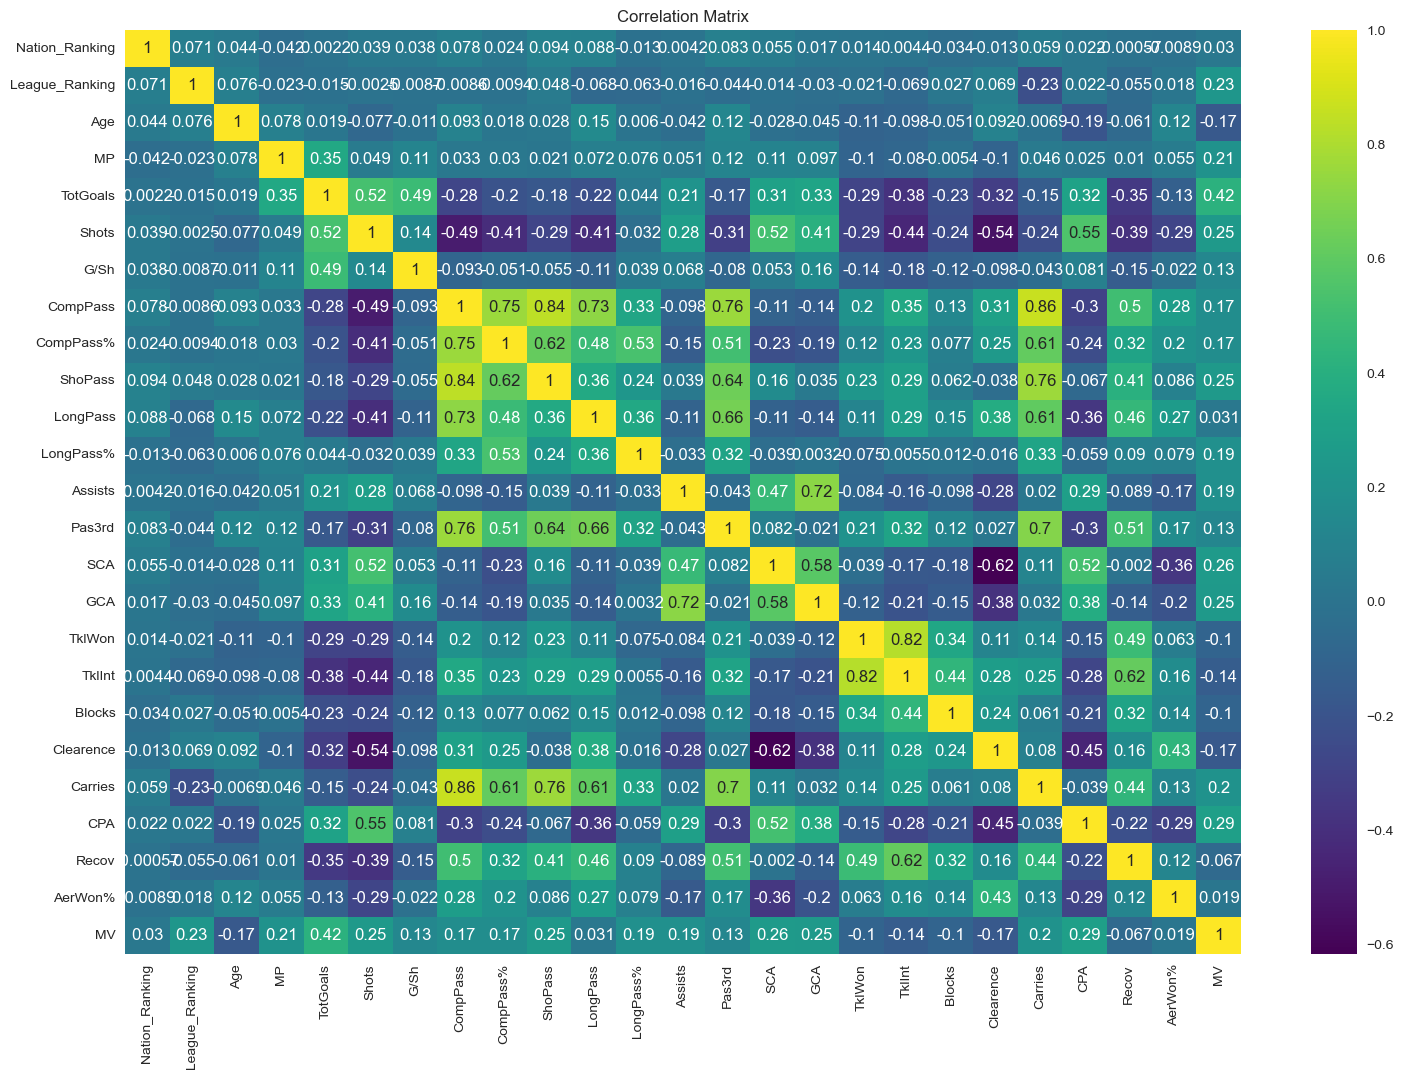

In [71]:
plt.figure(figsize=(18,12))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show();

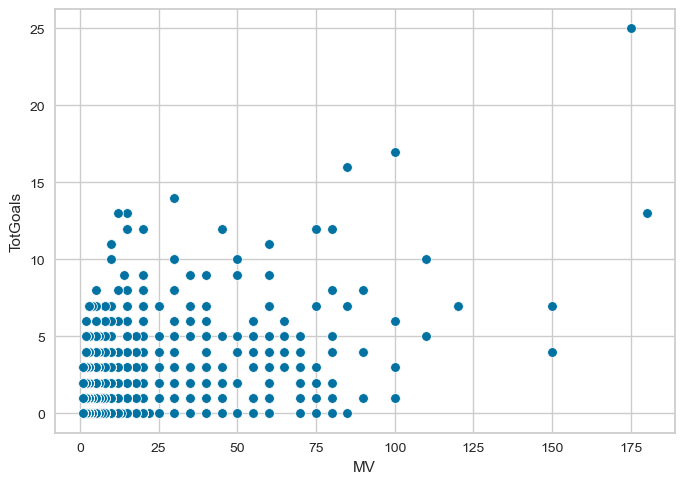

In [72]:
sns.scatterplot( x = "MV", y = "TotGoals", data = df);

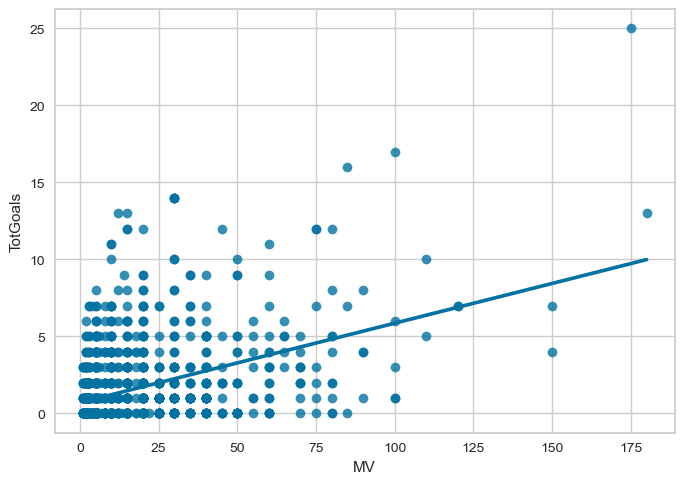

In [73]:
sns.regplot(x="MV", y = "TotGoals", data = df, ci = None);

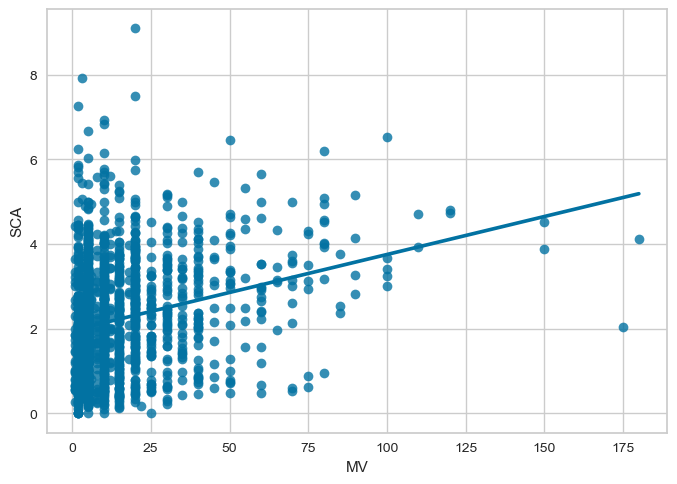

In [74]:
sns.regplot(x="MV", y = "SCA", data = df, ci = None);

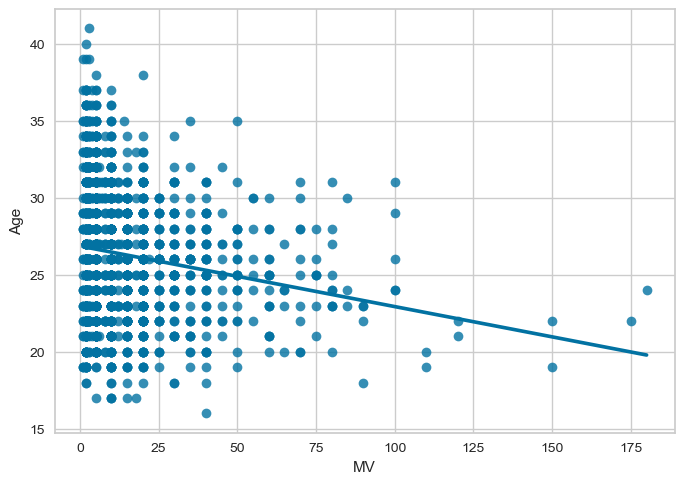

In [75]:
sns.regplot(x="MV", y = "Age", data = df, ci = None);

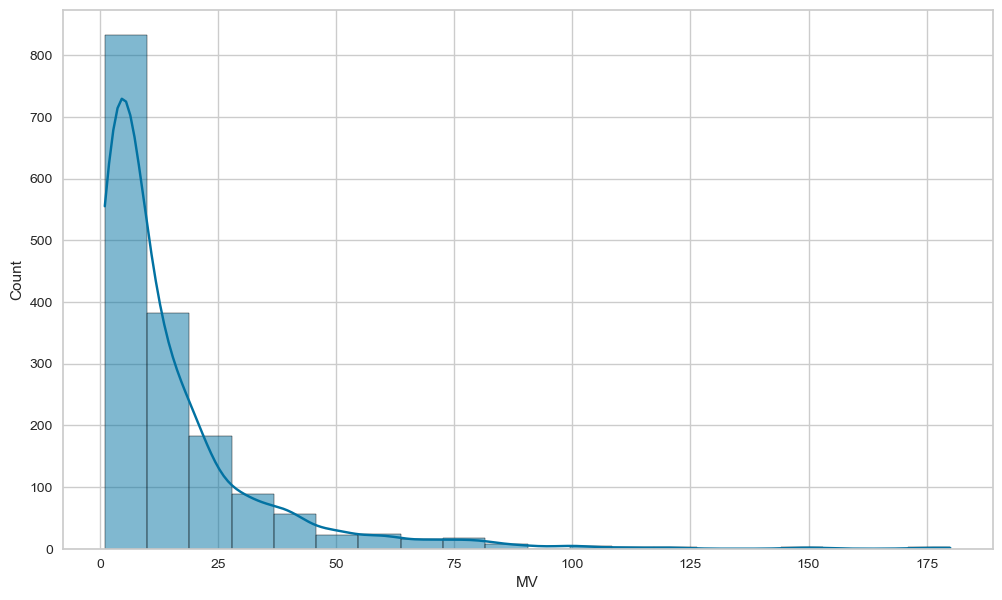

In [76]:
plt.figure(figsize=(12,7))
sns.histplot(df.MV,kde=True,bins=20);

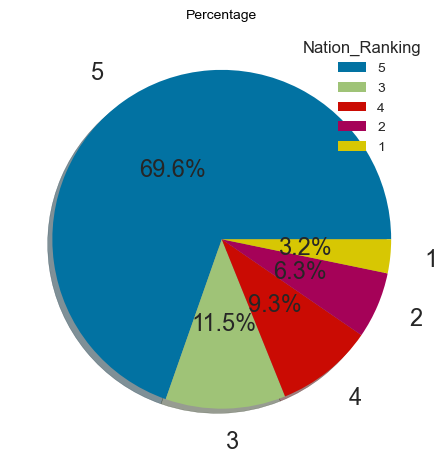

In [77]:
plt.pie(df.Nation_Ranking.value_counts(normalize=True),
        labels=df.Nation_Ranking.value_counts(normalize=True).index,
        autopct="%.1f%%",  shadow=True,
       labeldistance=1.2,
        pctdistance=0.5,
        textprops={'fontsize': 17})
plt.legend(title="Nation_Ranking");
plt.title("Percentage", {'fontsize': 10,'color': "black"});

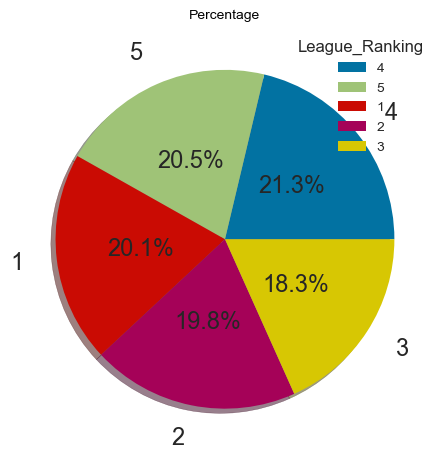

In [78]:
plt.pie(df.League_Ranking.value_counts(normalize=True),
        labels=df.League_Ranking.value_counts(normalize=True).index,
        autopct="%.1f%%",  shadow=True,
       labeldistance=1.2,
        pctdistance=0.5,
        textprops={'fontsize': 17})
plt.legend(title="League_Ranking");
plt.title("Percentage", {'fontsize': 10,'color': "black"});

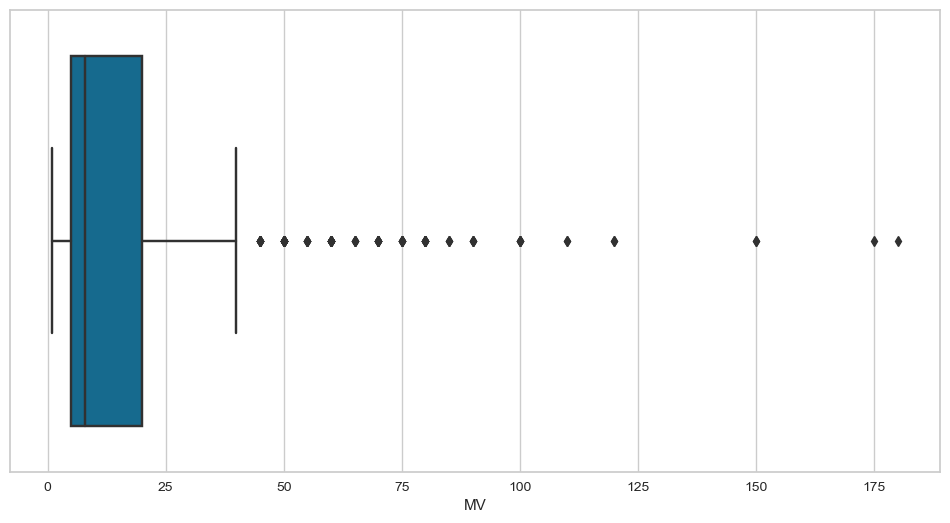

In [79]:
plt.figure(figsize=(12,6))
sns.boxplot(x="MV",data=df);

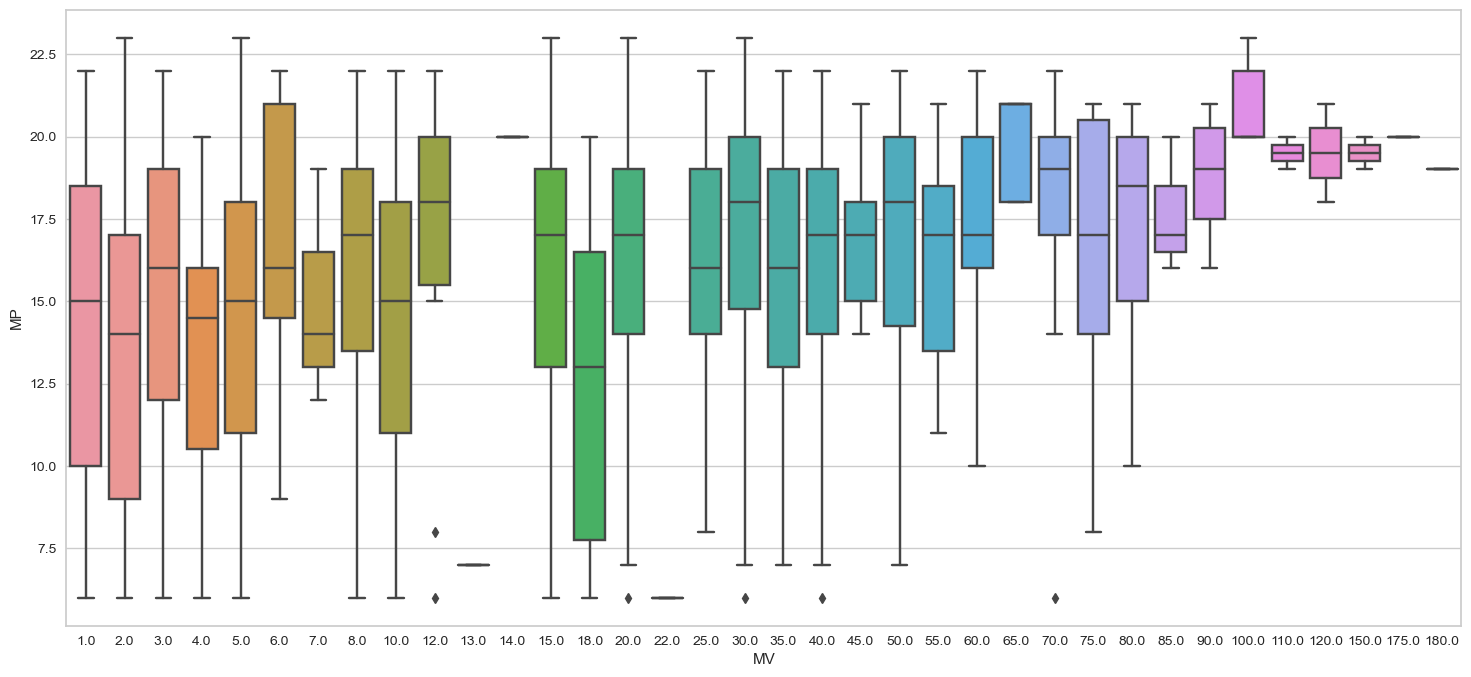

In [80]:
plt.figure(figsize=(18,8))
sns.boxplot(x="MV",y="MP",data=df);

In [81]:
from scipy.stats import skew

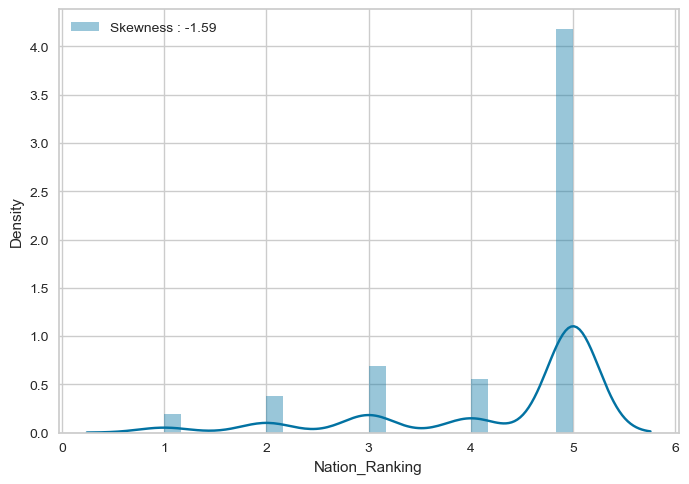

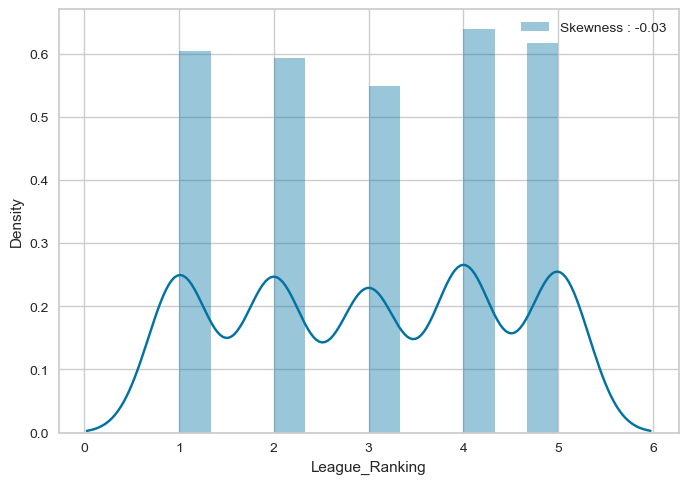

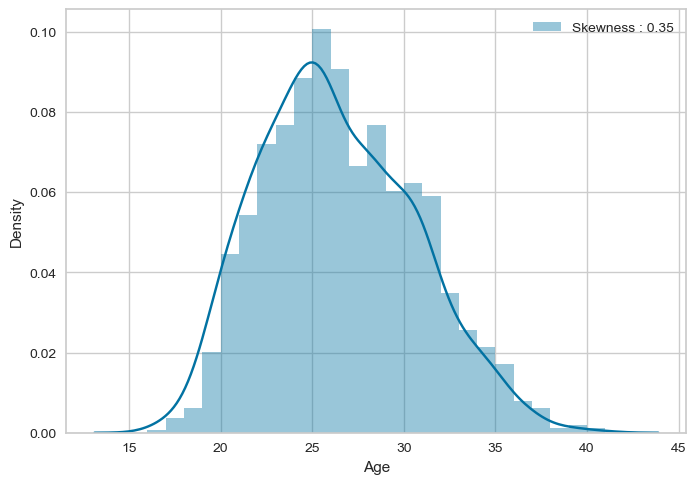

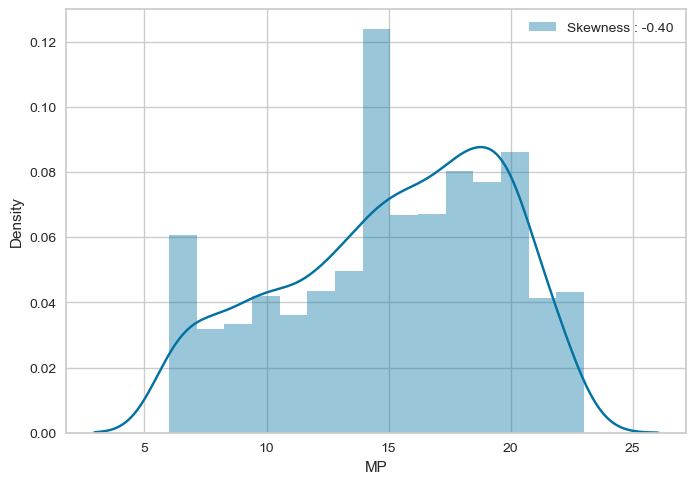

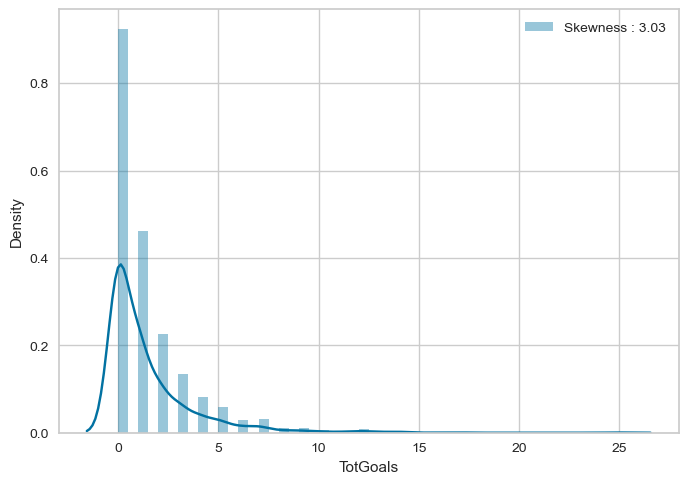

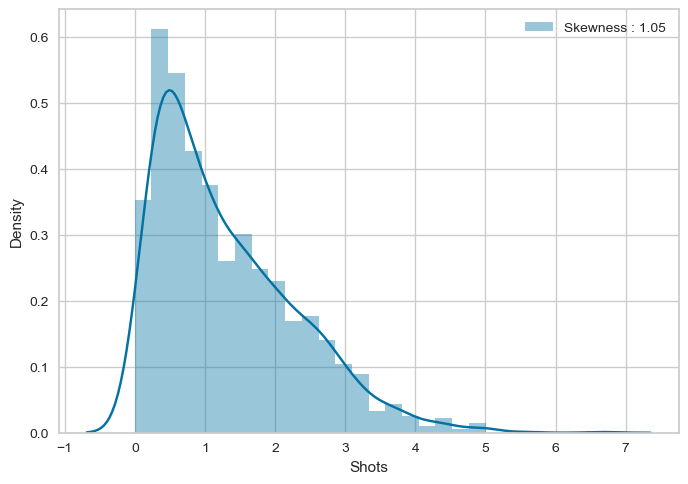

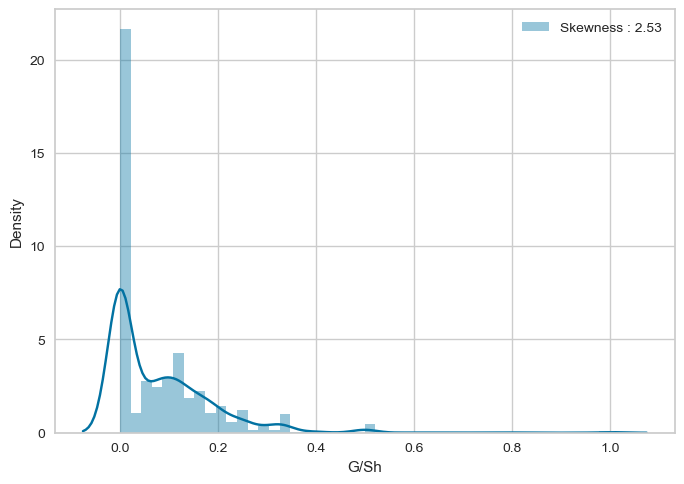

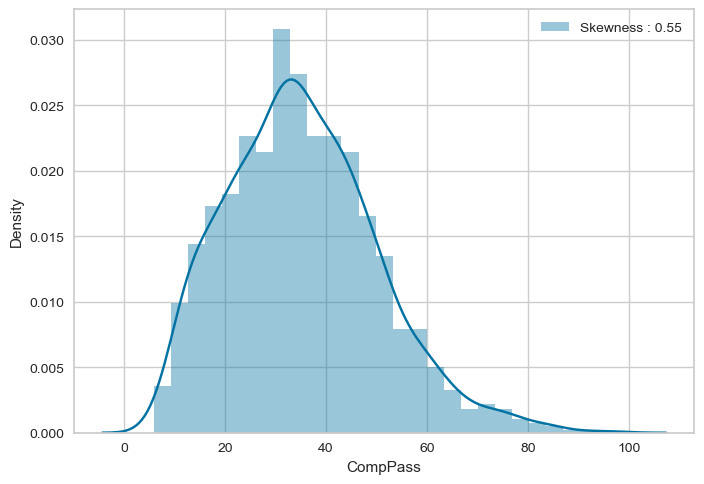

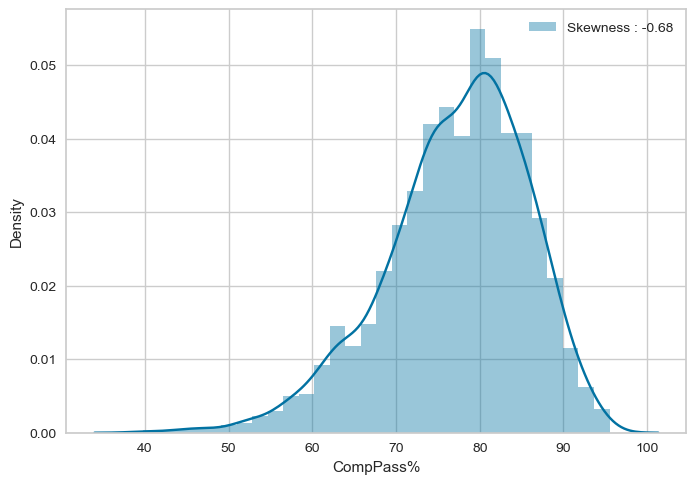

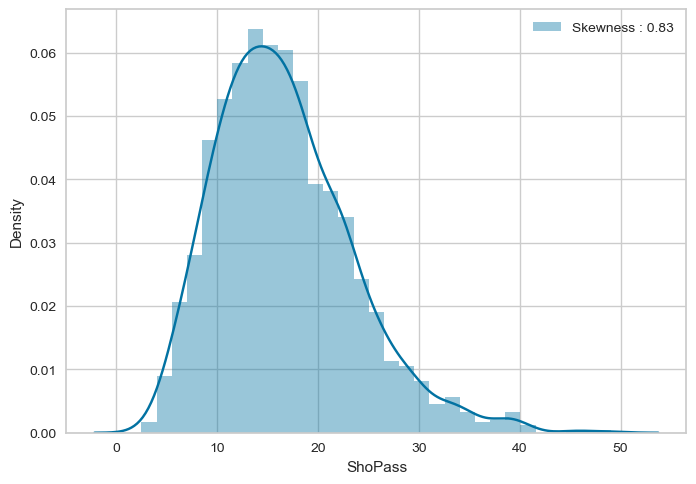

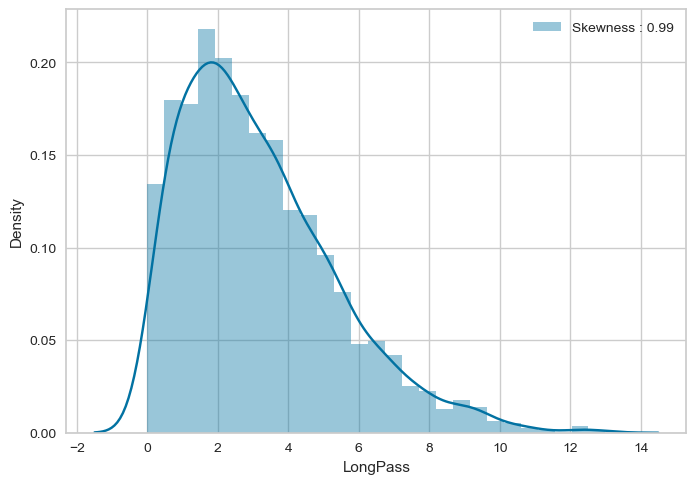

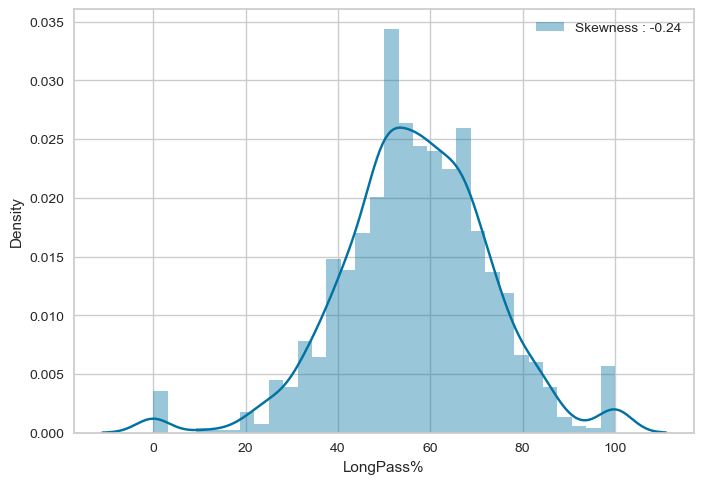

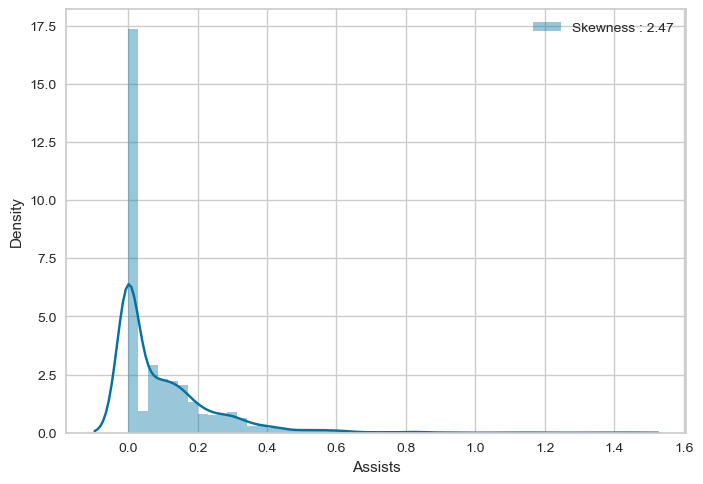

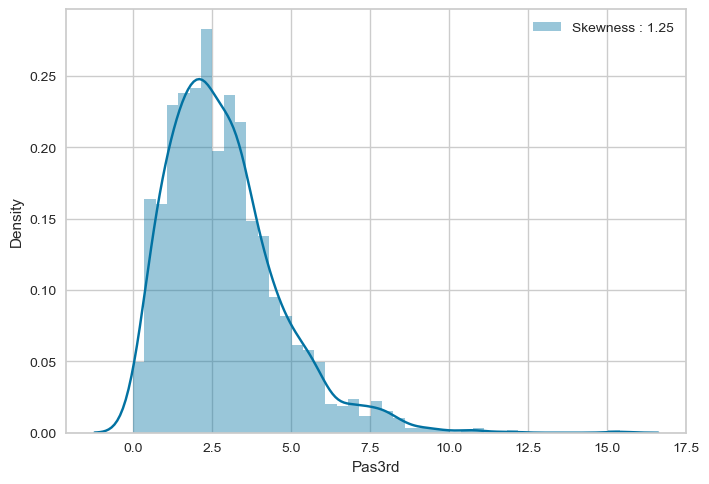

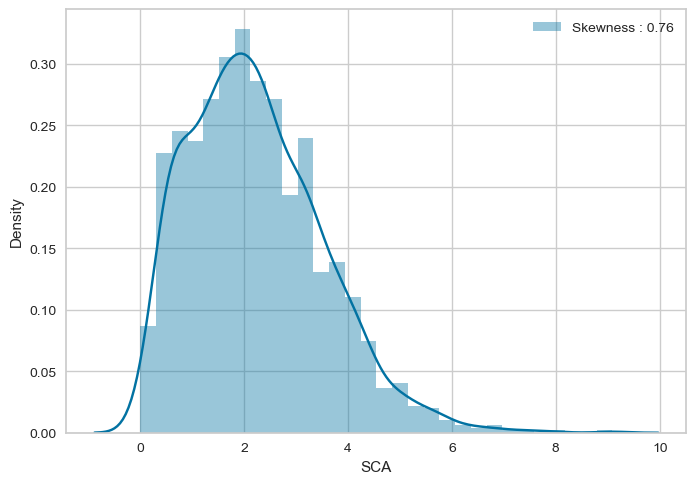

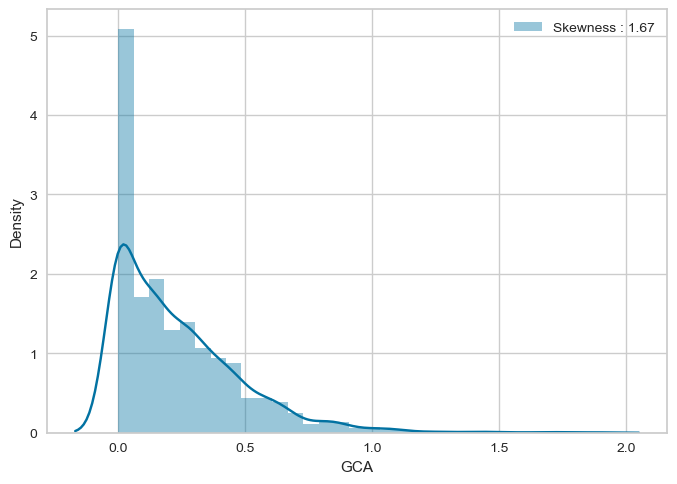

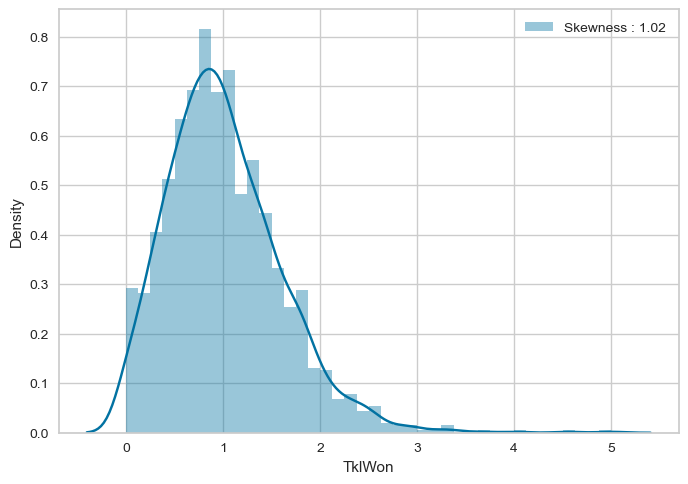

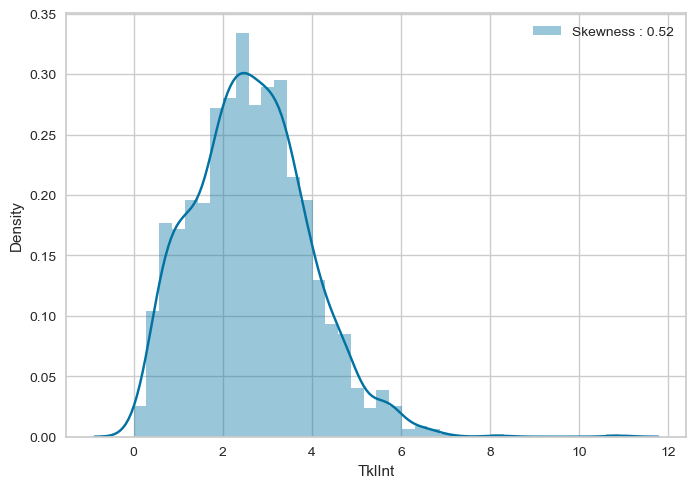

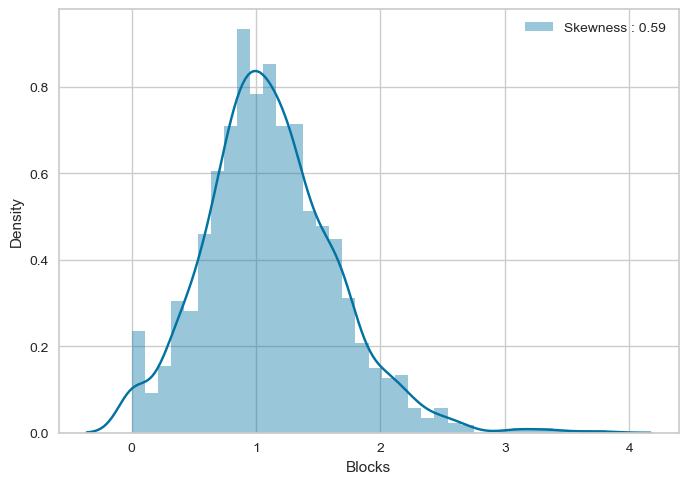

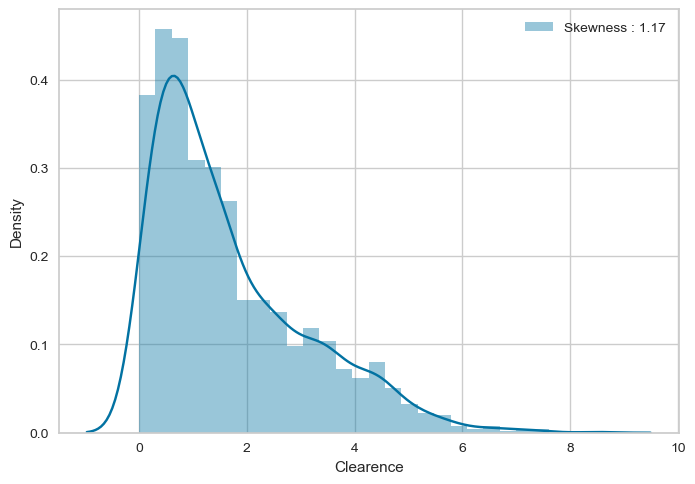

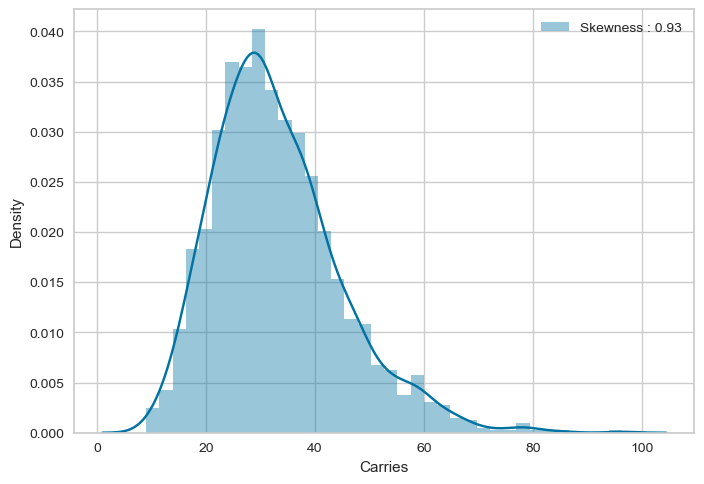

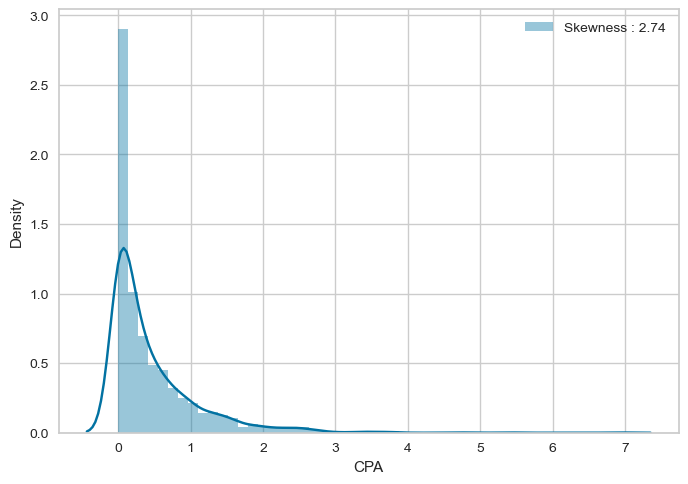

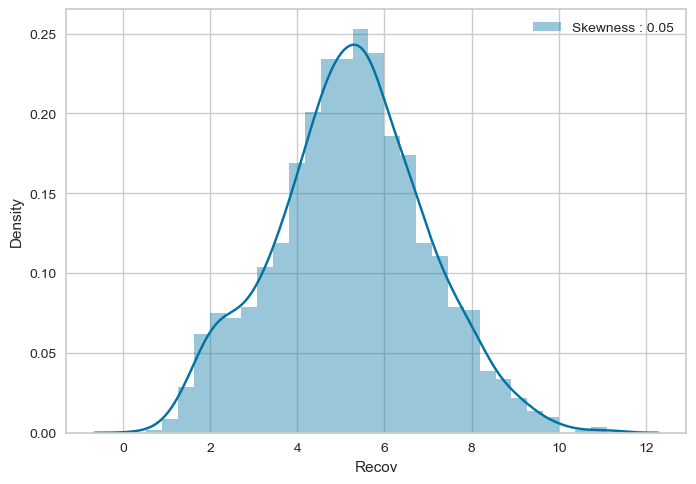

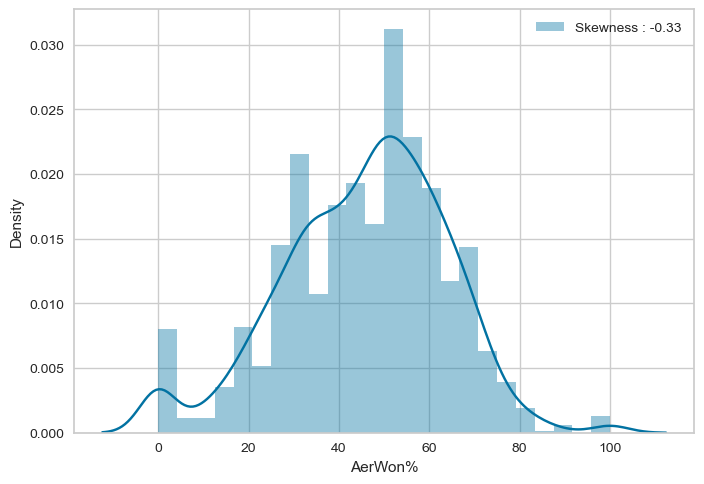

In [82]:
for j in df.drop(columns = "MV").columns:
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()

---

## MODEL - LINEAR REGRESSION

In [83]:
X= df.drop('MV', axis=1)
y= df['MV']

print(X,y)

      Nation_Ranking  League_Ranking  Age  MP  TotGoals  Shots  G/Sh  \
0                  5               1   24  19        13   4.42  0.15   
1                  2               5   22  20        25   3.85  0.30   
2                  5               3   19  19         4   2.07  0.10   
3                  5               4   22  20         7   2.51  0.14   
4                  5               5   22  18         7   2.41  0.25   
...              ...             ...  ...  ..       ...    ...   ...   
1635               5               4   26  16         1   0.55  0.13   
1636               5               3   22   8         0   0.35  0.00   
1637               5               1   39  19         1   0.62  0.09   
1638               5               2   21  22         1   0.79  0.07   
1639               5               1   29  21         3   1.92  0.09   

      CompPass  CompPass%  ShoPass  ...   SCA   GCA  TklWon  TklInt  Blocks  \
0         33.6       79.9    20.70  ...  4.11  0.49    0

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [85]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\ny Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (1312, 24)
y Train features shape: (1312,)
X Test features shape : (328, 24)
y Test features shape : (328,)


In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
model = LinearRegression()

In [88]:
model.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred= model.predict(X_test)
y_pred

array([ 25.40443052,  -5.47050244,  15.6273132 ,  17.73605281,
         6.17697313,   4.89184387,   1.45435059,  -4.99261331,
        22.18045526,  27.93689903,  11.13594942,   2.25485495,
         4.58323762,  14.31275268,  21.54878178,   9.34458995,
        43.62757444,  12.07828507,   9.29206402,  25.65877574,
        24.34574824,  15.43141892,   8.09641624, -18.11272918,
         6.06975558,   8.04481119,  21.40802796,  40.9267809 ,
        19.53079625,  14.61754961,  24.76882656,  16.47588882,
         9.19273281,  35.71558265,  -3.07940758,  10.23315948,
        19.25303818,  27.85605746,  57.02894876,   2.0394442 ,
        27.91994869,  14.56286244,  26.70249785,  41.59940442,
        14.70458957,   9.22672846,   6.73354628,  26.50295689,
        11.55420597,  21.13809597,  15.45177179,   3.8853645 ,
        22.11137181,  -1.03715111,   6.40996081,  15.66682781,
        12.15704451,   4.57660955,  58.12913321,  21.28481473,
        13.154966  ,  35.97642442,  18.0952004 ,  30.68

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [91]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [92]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.40013038990222216
MAE 		: 8.994761980103664
MSE 		: 153.43515894732593
RMSE 		: 12.386894645040215


In [93]:
y_train_pred = model.predict(X_train)

In [94]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.4581816346817349
MAE 		: 9.471048885718282
MSE 		: 200.3408479997238
RMSE 		: 14.154181290336922


In [95]:
residuals = y_test - y_pred

In [96]:
mean_residual = np.mean(residuals)
mean_residual

0.05783401207913832

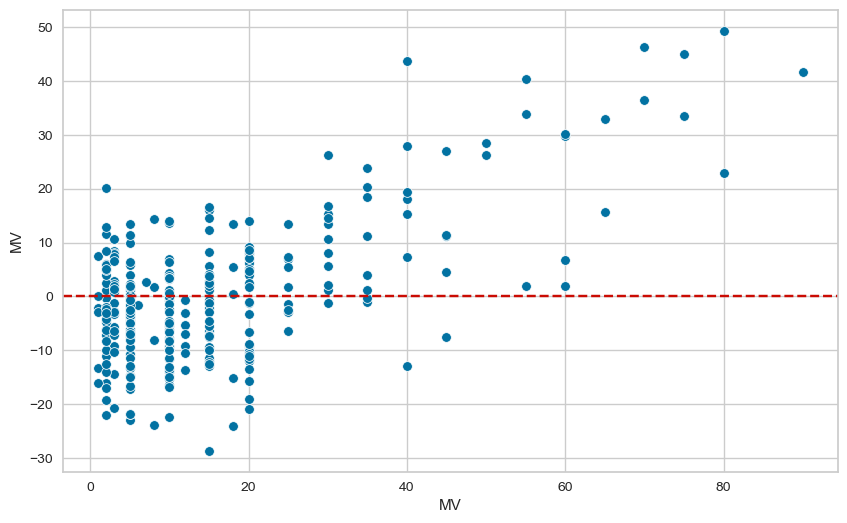

In [97]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y= 0, color = "r", linestyle = "--")
plt.show()

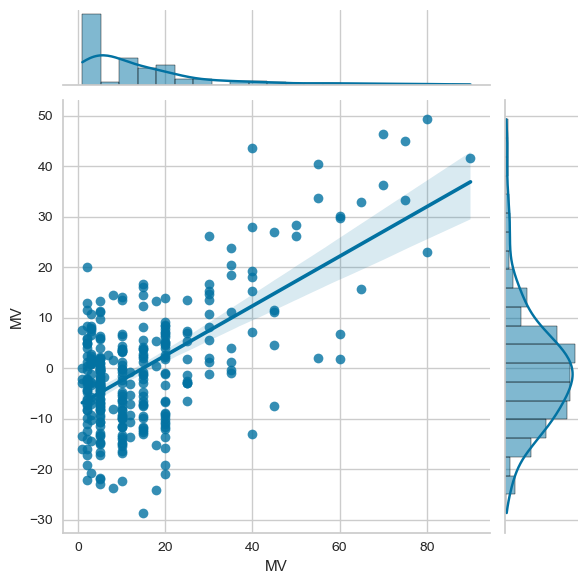

In [98]:
sns.jointplot(x = y_test, y = residuals, kind = "reg");

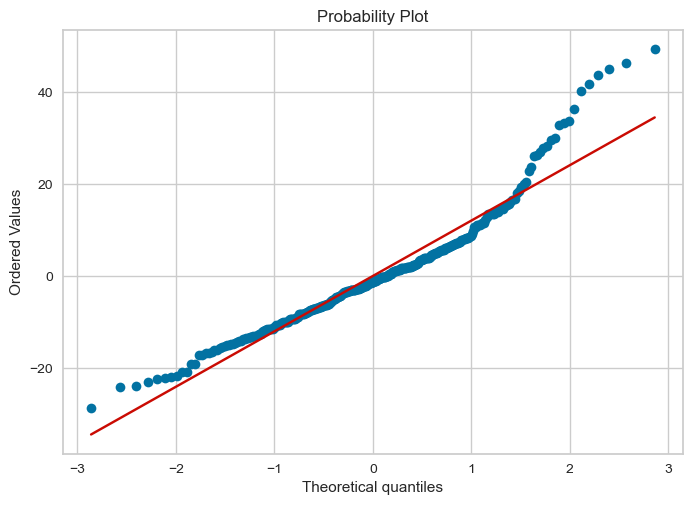

In [99]:
stats.probplot(residuals, dist = "norm", plot=plt);

In [100]:
from yellowbrick.regressor import ResidualsPlot

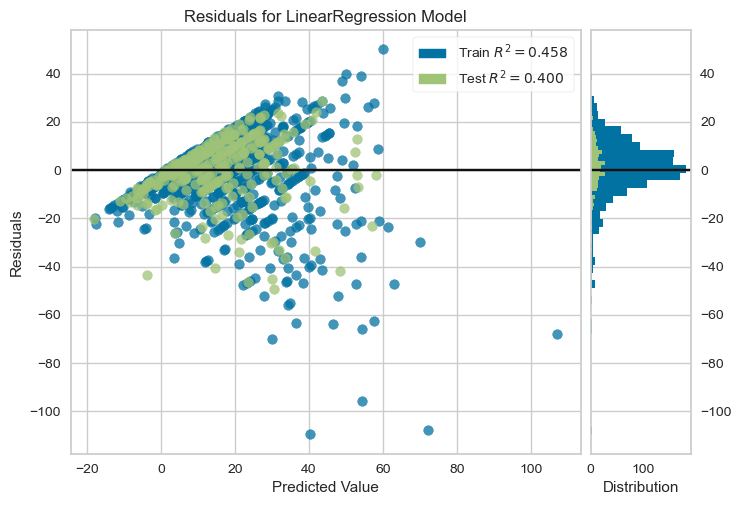

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [101]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()    

In [102]:
from yellowbrick.regressor import PredictionError

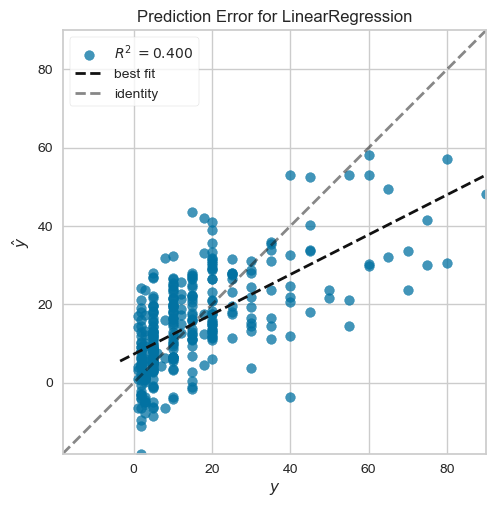

In [103]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

---

## MODEL - RANDOM FOREST

In [104]:
X=df.drop("MV", axis=1)
y=df.MV

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

In [106]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (1312, 24)
Train target shape   :  (1312,)
Test features shape  :  (328, 24)
Test target shape    :  (328,)


In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
rf_model = RandomForestRegressor(random_state=101)

In [109]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=101)

In [110]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [111]:
train_val(rf_model, X_train, y_train, X_test, y_test)

train        test
R2     0.916936    0.358789
mae    3.407401    8.936463
mse   29.994710  185.479995
rmse   5.476743   13.619104

In [112]:
from sklearn.model_selection import cross_validate, cross_val_score
model = RandomForestRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                               0.394242
test_neg_mean_absolute_error         -9.245047
test_neg_mean_squared_error        -212.436375
test_neg_root_mean_squared_error    -14.272949
dtype: float64

In [113]:
df_f_i = pd.DataFrame(index=X.columns, data = rf_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

Feature Importance
Nation_Ranking            0.004181
G/Sh                      0.016131
Clearence                 0.016339
TklWon                    0.020363
LongPass                  0.021132
Pas3rd                    0.023111
TklInt                    0.024468
MP                        0.025473
Assists                   0.028704
Carries                   0.028775
Blocks                    0.028850
CompPass%                 0.031597
LongPass%                 0.032115
AerWon%                   0.032353
Shots                     0.036126
CompPass                  0.037424
GCA                       0.039074
Recov                     0.041868
Age                       0.058675
SCA                       0.066047
CPA                       0.068804
League_Ranking            0.074473
ShoPass                   0.080615
TotGoals                  0.163303

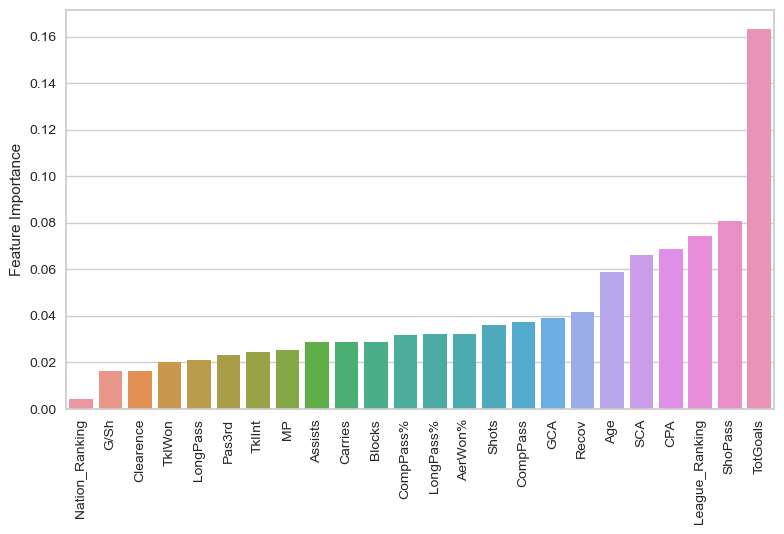

In [114]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

GridSearch CV

In [115]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

In [116]:
X=df.drop("MV", axis=1)
y=df.MV

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

In [118]:
rf_model = RandomForestRegressor()

In [119]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [120]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [121]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=scorer, cv=5)

In [122]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'))

In [123]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [124]:
rf_model = RandomForestRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=2)

In [125]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5)

In [126]:
y_pred = rf_model.predict(X_test)

In [127]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.33641262516966464
MAE 		: 8.994601957493725
MSE 		: 191.95271448618743
RMSE 		: 13.854700086475615


In [128]:
from sklearn.model_selection import cross_validate, cross_val_score
model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=2)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                               0.407776
test_neg_mean_absolute_error         -8.995247
test_neg_mean_squared_error        -208.134888
test_neg_root_mean_squared_error    -14.102323
dtype: float64

---

## MODEL - ANN (DEEP LEARNING)

In [129]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from keras import models
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


---

Test-1

In [130]:
X=df.drop("MV", axis=1)
y=df.MV

In [131]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

In [132]:
scaler = MinMaxScaler()

In [133]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
model = Sequential([Dense(units = 2, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 8, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])
model.compile(optimizer="adam", loss="mse")

In [135]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 300)

Epoch 1/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - loss: 537.7394 
Epoch 2/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 560.6711
Epoch 3/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 570.6060
Epoch 4/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 547.8605
Epoch 5/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 503.6551
Epoch 6/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 358.7404
Epoch 7/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 391.1678
Epoch 8/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 344.0290
Epoch 9/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 388.5381
Epoch 10/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 350.6514
Epoch 11/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 303.8340
Epoch 12/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 327.7321
Epoch 13/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 392.3421
Epoch 14/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 312.7587
Epoch 15/300
4

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 155.6912
Epoch 80/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 160.9877
Epoch 81/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 166.3870
Epoch 82/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 188.4497
Epoch 83/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 182.1452
Epoch 84/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 183.9672
Epoch 85/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 182.0924
Epoch 86/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 149.6423
Epoch 87/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 174.7477
Epoch 88/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 151.7732
Epoch 89/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 164.6918
Epoch 90/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 175.7193
Epoch 91/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 179.0600
Epoch 92/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 157.5488
Epoch 93/300
41/41 

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 171.4834
Epoch 234/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 136.1713
Epoch 235/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 178.0632
Epoch 236/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 139.3483
Epoch 237/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 137.7513
Epoch 238/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 163.5301
Epoch 239/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 149.3551
Epoch 240/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 143.7722
Epoch 241/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 137.8365
Epoch 242/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 158.3898
Epoch 243/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 159.7547
Epoch 244/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 138.3876
Epoch 245/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 175.2525
Epoch 246/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 149.4162
Epoch 

In [136]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (32, 2)                     │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 4)                     │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 8)                     │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 4)                     │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 1)                     │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431 (1.69 KB)

 Trainable params: 143 (572.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 288 (1.13 KB)

In [137]:
y_pred = model.predict(X_test)
eval_metric(y_test, y_pred)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model testing performance: 
---------------------------
R2_score 	: 0.4508306403089274
MAE 		: 7.90592957560609
MSE 		: 158.85556793827638
RMSE 		: 12.603791807955112


In [138]:
y_train_pred = model.predict(X_train)
eval_metric(y_train, y_train_pred)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
Model testing performance: 
---------------------------
R2_score 	: 0.5906807195354885
MAE 		: 7.802027539145656
MSE 		: 147.80737452198804
RMSE 		: 12.157605624545814


Test-2

In [139]:
X=df.drop("MV", axis=1)
y=df.MV

In [140]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

In [141]:
scaler = MinMaxScaler()

In [142]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [143]:
model = Sequential([Dense(units = 128, activation = "relu"),
                    (Dropout(0.3)),
                    Dense(units = 1)])
model.compile(optimizer="adam", loss="mse")

In [144]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 300)

Epoch 1/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 637.7333  
Epoch 2/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 519.9915
Epoch 3/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 328.2357
Epoch 4/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 322.9735
Epoch 5/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 317.7070
Epoch 6/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 273.9844
Epoch 7/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 332.9155
Epoch 8/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 390.3675
Epoch 9/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 345.3101
Epoch 10/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 269.5769
Epoch 11/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 259.9598
Epoch 12/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 338.5211
Epoch 13/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 252.1501
Epoch 14/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 257.8520
Epoch 15/300


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 220.1395
Epoch 80/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 203.3899
Epoch 81/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 207.0401
Epoch 82/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 165.4766
Epoch 83/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 201.3213
Epoch 84/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 172.5407
Epoch 85/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 207.9644
Epoch 86/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 197.6496
Epoch 87/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 161.2989
Epoch 88/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 170.4962
Epoch 89/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 165.1055
Epoch 90/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 181.3464
Epoch 91/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 208.5521
Epoch 92/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 181.4803
Epoch 93/300
41/41 

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 176.4897
Epoch 234/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 160.1524
Epoch 235/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 156.4153
Epoch 236/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 168.3642
Epoch 237/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 155.7033
Epoch 238/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 188.1761
Epoch 239/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 177.6533
Epoch 240/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 142.4598
Epoch 241/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 157.6855
Epoch 242/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 154.5432
Epoch 243/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 153.5040
Epoch 244/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 166.8005
Epoch 245/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 148.1977
Epoch 246/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 149.1697
Epoch 

In [145]:
y_pred = model.predict(X_test)
eval_metric(y_test, y_pred)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model testing performance: 
---------------------------
R2_score 	: 0.524233585083695
MAE 		: 7.468775530050441
MSE 		: 137.62265267312563
RMSE 		: 11.731268161333864


In [146]:
y_train_pred = model.predict(X_train)
eval_metric(y_train, y_train_pred)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
Model testing performance: 
---------------------------
R2_score 	: 0.5893313705680867
MAE 		: 7.625946257172561
MSE 		: 148.29463162837033
RMSE 		: 12.177628325268033


Test-3

In [147]:
X=df.drop("MV", axis=1)
y=df.MV

In [148]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

In [149]:
scaler = MinMaxScaler()

In [150]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [151]:
model = Sequential([Dense(units = 128, activation = "relu"),
                    (Dropout(0.5)),
                    Dense(units = 1)])

opt = Adam(learning_rate = 0.0001)
model.compile(optimizer = opt, loss = 'mse')

In [152]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 1000)

Epoch 1/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 608.3304 
Epoch 2/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 549.5037
Epoch 3/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 504.7359
Epoch 4/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 485.7136
Epoch 5/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 501.5500
Epoch 6/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 459.1757
Epoch 7/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 462.6007
Epoch 8/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 578.3736
Epoch 9/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 473.1426
Epoch 10/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 453.0028
Epoch 11/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 388.9998
Epoch 12/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 364.3842
Epoch 13/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 553.4895
Epoch 14/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 441.3143


Epoch 155/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 389.3397
Epoch 156/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 208.4424
Epoch 157/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 259.8349
Epoch 158/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 234.2409
Epoch 159/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 216.0988
Epoch 160/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 292.3989
Epoch 161/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 262.7139
Epoch 162/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 291.3009
Epoch 163/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 228.7993
Epoch 164/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 232.0015
Epoch 165/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 280.9730
Epoch 166/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 241.1088
Epoch 167/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 242.9682
Epoch 168/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 217.5742
Epoch 308/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 243.0009
Epoch 309/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 214.0657
Epoch 310/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 244.3010
Epoch 311/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 245.7713
Epoch 312/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 296.0067
Epoch 313/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 253.0371
Epoch 314/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 254.9453
Epoch 315/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 268.3863
Epoch 316/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 196.2887
Epoch 317/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 211.2222
Epoch 318/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 222.5003
Epoch 319/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 193.5332
Epoch 320/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 21

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 255.9126
Epoch 460/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 195.4983
Epoch 461/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 222.7728
Epoch 462/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 202.3189
Epoch 463/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 248.1221
Epoch 464/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 250.3958
Epoch 465/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 253.1366
Epoch 466/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 230.9663
Epoch 467/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 187.4957
Epoch 468/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 181.4017
Epoch 469/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 198.2106
Epoch 470/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 229.0387
Epoch 471/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 244.2936
Epoch 472/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 24

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 194.5225
Epoch 612/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 236.4296
Epoch 613/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 274.4161
Epoch 614/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 208.6391
Epoch 615/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 245.9738
Epoch 616/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 206.6475
Epoch 617/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 206.6834
Epoch 618/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 257.2909
Epoch 619/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 203.7874
Epoch 620/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 194.1900
Epoch 621/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 240.4036
Epoch 622/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 180.4453
Epoch 623/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 181.0034
Epoch 624/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 23

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 153.3323
Epoch 764/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 204.8231
Epoch 765/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 199.7259
Epoch 766/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 171.1637
Epoch 767/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 215.3939
Epoch 768/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 233.6433
Epoch 769/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 204.8368
Epoch 770/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 233.4845
Epoch 771/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 185.5144
Epoch 772/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 185.8882
Epoch 773/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 226.4230
Epoch 774/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 201.9084
Epoch 775/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 220.3026
Epoch 776/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 16

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 165.8231
Epoch 916/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 173.0514
Epoch 917/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 186.3950
Epoch 918/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 204.1501
Epoch 919/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 203.0790
Epoch 920/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 201.6513
Epoch 921/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 204.4734
Epoch 922/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 191.0423
Epoch 923/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 205.2236
Epoch 924/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 203.2031
Epoch 925/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 228.8982
Epoch 926/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 231.6976
Epoch 927/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 190.8498
Epoch 928/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 15

In [153]:
y_pred = model.predict(X_test)
eval_metric(y_test, y_pred)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model testing performance: 
---------------------------
R2_score 	: 0.4325094528827491
MAE 		: 8.601859768171137
MSE 		: 164.1552493253195
RMSE 		: 12.81230850882539


In [154]:
y_train_pred = model.predict(X_train)
eval_metric(y_train, y_train_pred)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
Model testing performance: 
---------------------------
R2_score 	: 0.48082560397123497
MAE 		: 8.754719309020423
MSE 		: 187.47664246102835
RMSE 		: 13.692211014333235


Test-3

In [155]:
X=df.drop("MV", axis=1)
y=df.MV

In [156]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state=5)

In [157]:
scaler = MinMaxScaler()

In [158]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
model = Sequential([Dense(units = 128, activation = "relu"),
                    (Dropout(0.3)),
                    Dense(units = 1)])
model.compile(optimizer="adam", loss="mse")

In [160]:
model.fit(x = X_train, y = y_train, batch_size = 16, epochs = 300)

Epoch 1/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 527.2487 
Epoch 2/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 310.1789
Epoch 3/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 272.0717
Epoch 4/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 338.5477
Epoch 5/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 307.3888
Epoch 6/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 310.2083
Epoch 7/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 288.7042
Epoch 8/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 222.3711
Epoch 9/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 275.5703
Epoch 10/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 270.3007
Epoch 11/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 268.1995
Epoch 12/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 261.7657
Epoch 13/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 257.1700
Epoch 14/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 250.4521
Epoch 15/300
9

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 182.3778
Epoch 80/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 169.8190
Epoch 81/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 158.8176
Epoch 82/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 170.0637
Epoch 83/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 185.2141
Epoch 84/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 218.4432
Epoch 85/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 229.2024
Epoch 86/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 212.3823
Epoch 87/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 187.2149
Epoch 88/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 149.7699
Epoch 89/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 162.8073
Epoch 90/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 169.2585
Epoch 91/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 179.9652
Epoch 92/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 188.2905
Epoch 93/300
93/93 

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 137.6826
Epoch 234/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 135.4779
Epoch 235/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 151.1808
Epoch 236/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 134.4093
Epoch 237/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 150.7475
Epoch 238/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 144.4100
Epoch 239/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 151.1071
Epoch 240/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 157.1229
Epoch 241/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 155.4900
Epoch 242/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 146.0614
Epoch 243/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 140.3452
Epoch 244/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 152.2757
Epoch 245/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 147.1396
Epoch 246/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 142.7727
Epoch 

In [161]:
y_pred = model.predict(X_test)
eval_metric(y_test, y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model testing performance: 
---------------------------
R2_score 	: 0.573273982652114
MAE 		: 7.400167960946153
MSE 		: 121.88960010402843
RMSE 		: 11.040362317606629


In [162]:
y_train_pred = model.predict(X_train)
eval_metric(y_train, y_train_pred)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
Model testing performance: 
---------------------------
R2_score 	: 0.6283494333017203
MAE 		: 7.327752543133772
MSE 		: 131.4178351361296
RMSE 		: 11.463761823072286


Test-4

In [163]:
X=df.drop("MV", axis=1)
y=df.MV

In [164]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state=5)

In [165]:
scaler = MinMaxScaler()

In [166]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [167]:
model = Sequential([Dense(units = 128, activation = "relu"),
                    (Dropout(0.3)),
                    Dense(units = 1)])

opt = Adam(learning_rate = 0.0022)
model.compile(optimizer = opt, loss = 'mse')

In [168]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 5)

In [169]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 320, callbacks = [early_stop])

Epoch 1/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 503.4488  
Epoch 2/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 299.5779
Epoch 3/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 374.7436
Epoch 4/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 327.3044
Epoch 5/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 298.1821
Epoch 6/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 266.7475
Epoch 7/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 275.0101
Epoch 8/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 266.0872
Epoch 9/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 223.8769
Epoch 10/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 224.9069
Epoch 11/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 213.1262
Epoch 12/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 236.9264
Epoch 13/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 216.9727
Epoch 14/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 208.2100
Epoch 15/320


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 175.5457
Epoch 80/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 168.4058
Epoch 81/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 166.6676
Epoch 82/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 182.9254
Epoch 83/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 156.2438
Epoch 84/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 151.4632
Epoch 85/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 185.1614
Epoch 86/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 156.5245
Epoch 87/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 152.6998
Epoch 88/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 145.5091
Epoch 89/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 160.0661
Epoch 90/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 157.3484
Epoch 91/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 150.0673
Epoch 92/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 186.0799
Epoch 93/320
47/47 

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 133.0999
Epoch 234/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 145.5250
Epoch 235/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 149.8133
Epoch 236/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 118.1360
Epoch 237/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 116.2144
Epoch 238/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 150.3978
Epoch 239/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 127.2224
Epoch 240/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 137.6441
Epoch 241/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 142.4392
Epoch 242/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 133.3786
Epoch 243/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 126.3964
Epoch 244/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 143.8735
Epoch 245/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 136.9930
Epoch 246/320
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 158.3515
Epoch 

In [170]:
y_pred = model.predict(X_test)
eval_metric(y_test, y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model testing performance: 
---------------------------
R2_score 	: 0.5890747527487252
MAE 		: 7.438248736102406
MSE 		: 117.37628366651322
RMSE 		: 10.834033582489637


In [171]:
y_train_pred = model.predict(X_train)
eval_metric(y_train, y_train_pred)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
Model testing performance: 
---------------------------
R2_score 	: 0.6669573836190325
MAE 		: 7.113838761237256
MSE 		: 117.76583590787742
RMSE 		: 10.851996862692019


In [172]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

Actual       Pred
362     20.0  15.557808
1486     2.0   3.758962
1512     2.0   4.818214
348     20.0  16.058136
217     30.0  12.906651
966      5.0  24.520769
568     15.0   5.473736
189     30.0  52.254082
1339     3.0   8.598475
1558     2.0  10.756927

---

## FINAL MODEL AND DEPLOYMENT

In [173]:
X=df.drop("MV", axis=1)
y=df.MV

In [174]:
scaler = MinMaxScaler().fit(X)

In [175]:
import pickle
pickle.dump(scaler, open("scaler", 'wb'))

In [176]:
X_scaled = scaler.transform(X)

In [177]:
final_model = Sequential()

final_model.add(Dense(units = 128, activation = "relu")),
final_model.add(Dropout(0.3)),
final_model.add(Dense(units = 1))

opt = Adam(learning_rate = 0.0022)
model.compile(optimizer = opt, loss = 'mse')

In [178]:
model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 320, callbacks = [early_stop])

Epoch 1/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 125.1157 
Epoch 2/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 120.5128
Epoch 3/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 141.9265
Epoch 4/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 122.6932
Epoch 5/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 132.2561
Epoch 6/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 121.4484
Epoch 7/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 132.4813
Epoch 8/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 125.5317
Epoch 9/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 124.9253
Epoch 10/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 129.5898
Epoch 11/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 128.5207
Epoch 12/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 122.2777
Epoch 13/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 124.1647
Epoch 14/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 124.9108
Epoch 15/320
5

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 124.5541
Epoch 80/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 119.9121
Epoch 81/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 118.4418
Epoch 82/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 115.1978
Epoch 83/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 116.0332
Epoch 84/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 122.0766
Epoch 85/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 129.4190
Epoch 86/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 123.8906
Epoch 87/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 114.1030
Epoch 88/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 120.0848
Epoch 89/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 115.0860
Epoch 90/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 119.2549
Epoch 91/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 118.0159
Epoch 92/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 127.0299
Epoch 93/320
52/52 

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 104.0839
Epoch 234/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 108.5833
Epoch 235/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 112.6811
Epoch 236/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 108.8481
Epoch 237/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 110.5957
Epoch 238/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 118.0701
Epoch 239/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 107.0179
Epoch 240/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 109.9565
Epoch 241/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 113.2687
Epoch 242/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 115.5323
Epoch 243/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 105.0817
Epoch 244/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 114.1360
Epoch 245/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 109.2941
Epoch 246/320
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 94.0633
Epoch 2

In [179]:
final_model.save('my_model.h5')

In [180]:
from tensorflow.keras.models import load_model
loaded_model = load_model('my_model.h5')

---

## PREDICTION

In [295]:
loaded_model = load_model('my_model.h5')
scaled_data = pickle.load(open("scaler", "rb"))

In [181]:
df.describe().T

count       mean        std    min      25%     50%      75%  \
Nation_Ranking  1640.0   4.357927   1.108208   1.00   4.0000   5.000   5.0000   
League_Ranking  1640.0   3.023780   1.427541   1.00   2.0000   3.000   4.0000   
Age             1640.0  26.297561   4.222517  16.00  23.0000  26.000  29.0000   
MP              1640.0  15.176220   4.458203   6.00  12.0000  16.000  19.0000   
TotGoals        1640.0   1.457927   2.303285   0.00   0.0000   1.000   2.0000   
Shots           1640.0   1.308335   1.001942   0.00   0.5000   1.050   1.9300   
G/Sh            1640.0   0.080829   0.110410   0.00   0.0000   0.050   0.1300   
CompPass        1640.0  35.252732  14.923869   5.83  24.2000  34.200  44.4000   
CompPass%       1640.0  77.194756   8.525359  39.80  72.3000  78.400  83.3000   
ShoPass         1640.0  16.658945   6.796168   2.50  11.7000  15.800  20.6000   
LongPass        1640.0   3.163982   2.193404   0.00   1.5075   2.730   4.4450   
LongPass%       1640.0  56.793415  16.117775   0.00  47.8000  57.000  66.7000   
Assists         1640.0   0.096762   0.141452   0.00   0.0000   0.050   0.1500   
Pas3rd          1640.0   2.866043   1.785318   0.00   1.5800   2.570   3.7300   
SCA             1640.0   2.222171   1.290104   0.00   1.2500   2.080   3.0500   
GCA             1640.0   0.233878   0.247812   0.00   0.0000   0.160   0.3600   
TklWon          1640.0   1.012256   0.591727   0.00   0.6000   0.940   1.3500   
TklInt          1640.0   2.642659   1.287608   0.00   1.7375   2.575   3.4525   
Blocks          1640.0   1.116652   0.528196   0.00   0.7800   1.080   1.4200   
Clearence       1640.0   1.675293   1.418730   0.00   0.5900   1.270   2.4400   
Carries         1640.0  33.016567  11.764046   9.03  24.7000  31.200  39.3250   
CPA             1640.0   0.462860   0.634516   0.00   0.0000   0.230   0.6500   
Recov           1640.0   5.222963   1.731879   0.53   4.1175   5.255   6.3425   
AerWon%         1640.0  45.666463  18.110008   0.00  33.3000  47.700  58.3000   
MV              1640.0  14.641463  18.633212   1.00   5.0000   8.000  20.0000   

                   max  
Nation_Ranking    5.00  
League_Ranking    5.00  
Age              41.00  
MP               23.00  
TotGoals         25.00  
Shots             6.67  
G/Sh              1.00  
CompPass         97.20  
CompPass%        95.50  
ShoPass          49.10  
LongPass         13.00  
LongPass%       100.00  
Assists           1.43  
Pas3rd           15.40  
SCA               9.09  
GCA               1.88  
TklWon            5.00  
TklInt           10.90  
Blocks            3.81  
Clearence         8.52  
Carries          96.40  
CPA               6.92  
Recov            11.10  
AerWon%         100.00  
MV              180.00

In [302]:
sample = np.array([5, 5, 25, 20, 20, 5.0, 0.5, 90.0, 90.0, 45.0, 10.0, 90.0, 1.0, 10.0, 5.0, 1.0, 5.0, 5.0, 3.0, 3.0, 90.0, 5.0, 10.0, 80.0]).reshape(1, 24)
sample_scaled = scaled_data.transform(sample)

In [320]:
prediction_scaled = loaded_model.predict(sample_scaled)

prediction_original = scaler.inverse_transform(prediction_scaled.reshape(-1, 1))

print("Tahmin (Orijinal Ölçek):", prediction_original)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Tahmin (Orijinal Ölçek): [[28128.613]]


---

## NOTES

The process that took me the most time was trying to get the dataset ready because the data was raw data. I assigned values to the target labels of 1500-2000 rows in the dataset myself from Excel. Normally, I could have gotten it from Transfermarkt using an API, but my research online showed that it is a paid service. So I had to assign the values myself. Also, I used my domain knowledge to remove unnecessary columns from the dataset. But still, there were 25 columns in the final dataset.

Since there was not much connection between the target label and the features, the machine's scores were generally very low. I was sure that I would get better results if I took processed and ready data, but I wanted to challenge myself a bit, to be honest.

Although it is not visible above, here are the other models I created and their scores:

svm= 34

xgboosting= 30

I also used GridSearch and CrossValidation in all the models I created, but the results never changed, the test score was always around 35-40.

However, after building the ANN model, this score increased to 55-60.

---